In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astroquery.mast import Catalogs
from astropy.stats import sigma_clip
from astropy.timeseries import LombScargle
import os
from sklearn.metrics import mean_squared_error
import re



/home/ruben/miniconda3/envs/tesis/lib/python3.10/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
## searching our star from catalog
star_info = Catalogs.query_object("GJ 1243", catalog="TIC")
star_info[:-1][0] #row where we have all information of the star

<Row index=0 masked=True>
    ID           ra              dec          pmRA   pmDEC    Tmag  objType typeSrc version  HIP   TYC     UCAC        TWOMASS      SDSS ALLWISE         GAIA         APASS     KIC   POSflag   e_pmRA   e_pmDEC  PMflag   plx     e_plx   PARflag     gallong           gallat          eclong           eclat         Bmag   e_Bmag   Vmag   e_Vmag   umag   e_umag   gmag   e_gmag   rmag   e_rmag   imag   e_imag   zmag   e_zmag   Jmag   e_Jmag   Hmag   e_Hmag   Kmag   e_Kmag       TWOMflag        prox   w1mag  e_w1mag  w2mag  e_w2mag  w3mag  e_w3mag  w4mag  e_w4mag GAIAmag e_GAIAmag   e_Tmag  TESSflag SPFlag   Teff   e_Teff   logg   e_logg     MH     e_MH    rad      e_rad      mass     e_mass    rho     e_rho   lumclass      lum          e_lum        d      e_d     ebv    e_ebv  numcont  contratio  disposition duplicate_id   priority   eneg_EBV epos_EBV EBVflag eneg_Mass epos_Mass eneg_Rad epos_Rad eneg_rho epos_rho eneg_logg epos_logg eneg_lum epos_lum eneg_dist epos_dist distflag eneg_Teff epos_Teff TeffFlag  gaiabp e_gaiabp  gaiarp e_gaiarp gaiaqflag starchareFlag VmagFlag BmagFlag    splists          e_RA            e_Dec           RA_orig          Dec_orig         e_RA_orig          e_Dec_orig     raddflag wdflag       dstArcSec      
  str11       float64          float64      float64 float64 float64   str8    str7    str8   str1 str12   str10         str17       str1  str19         str19          str8     str7    str8   float64   float64   str5  float64  float64    str5      float64          float64         float64          float64      float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64        str19        float64 float64 float64 float64 float64 float64 float64 float64 float64 float64  float64   float64    str5    str5  float64 float64 float64 float64  float64 float64 float64   float64   float64   float64  float64  float64    str5      float64       float64    float64 float64 float64 float64  int64    float64       str9       str11       float64    float64  float64    str9   float64   float64  float64  float64  float64  float64   float64   float64  float64  float64   float64   float64    str6    float64   float64    str5   float64 float64  float64 float64    int64        str1       str8     str8       str13         float64          float64          float64          float64           float64            float64        int64   int64         float64       
--------- ---------------- ---------------- ------- ------- ------- ------- ------- -------- ---- ----- ---------- ---------------- ---- ------- ------------------- -------- ------- ------- --------- --------- ------ ------- --------- ------- ---------------- --------------- ---------------- ---------------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------------------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- --------- --------- -------- ------ ------- ------- ------- -------- ------- ------- -------- ---------- -------- --------- ------- --------- -------- ------------- ------------- ------- ------- ------- ------- ------- ----------- ----------- ------------ ------------ -------- -------- ------- --------- --------- -------- -------- -------- -------- --------- --------- -------- -------- --------- --------- -------- --------- --------- -------- ------- -------- ------- -------- --------- ------------- -------- -------- ------------- ---------------- ---------------- ---------------- ---------------- ------------------ ------------------ -------- ------ ---------------------
273589987 297.788835531591 46.4833913684977 183.293 266.019 10.2463    STAR tmgaia2 20190415   --    -- 683-075562 19510930+4628598   --      -- 2080285727861817088 53740263 9726699 tmgaia2 0.0661744 0.0724241  gaia2 83.4

In [3]:
## temperature, distance, mass, radius 
star_temperature, star_distance, star_mass,star_radius, log_g = star_info["Teff"][0],star_info["d"][0],star_info["mass"][0],star_info["rad"][0],star_info['logg'][0]
print(f"star temperature {star_temperature}\n star distance {star_distance}\n star mass {star_mass}\n star radius {star_radius}\n log g {log_g} ") 

star temperature 3261.0
 star distance 11.9746
 star mass 0.241211
 star radius 0.268565
 log g 4.96237 


In [4]:
## spot temperature
spot_temperature = (0.751*star_temperature)-3.58*(10**-5)*star_temperature**2+808
print(spot_temperature)


2876.3094682


In [5]:
search14 = lk.search_lightcurve("TIC 273589987", mission="TESS", sector=14, exptime=120)
search15 = lk.search_lightcurve("TIC 273589987", mission="TESS", sector=15, exptime=120)

print(search14)
print(search15)


SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 14 2019   SPOC     120   273589987      0.0
  1 TESS Sector 14 2019  TASOC     120   273589987      0.0
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 15 2019   SPOC     120   273589987      0.0
  1 TESS Sector 15 2019  TASOC     120   273589987      0.0


In [6]:
lc14 = search14[0].download()
#lc15 = search15[0].download()

#lc14_norm = lc14.normalize()
#lc15_norm = lc15.normalize()

#lc_all = lc14_norm.append(lc15_norm)

lc14

<TessLightCurve length=18409 LABEL="TIC 273589987" SECTOR=14 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
       time             flux      ...   pos_corr1      pos_corr2   
                    electron / s  ...      pix            pix      
       Time           float32     ...    float32        float32    
------------------ -------------- ... -------------- --------------
1683.3561529838314  1.1284656e+04 ... -1.6942209e-02 -4.6222195e-02
1683.3575418921516  1.1300812e+04 ... -1.5412522e-02 -4.6145760e-02
1683.3589308007051  1.1299353e+04 ... -1.8548727e-02 -4.7316205e-02
1683.3603197092577  1.1295824e+04 ... -2.0365570e-02 -5.0206997e-02
1683.3617086175773  1.1281124e+04 ... -2.0553343e-02 -4.3092389e-02
1683.3630975258977  1.1289905e+04 ... -1.8217841e-02 -4.3031115e-02
1683.3644864344508  1.1299105e+04 ... -2.0982368e-02 -4.9291022e-02
1683.3658753427715  1.1284609e+04 ... -2.1124538e-02 -4.5857053e-02
1683.3672642513245  1.1277765e+04 ... -2.3855491e-02 -4.0942028e-02
               ...            ... ...            ...            ...
1710.1952356147428  1.1347011e+04 ... -6.7880210e-03 -2.8732231e-02
1710.1966245090937  1.1350601e+04 ... -5.8968519e-03 -3.4419790e-02
 1710.198013403444  1.1345309e+04 ... -2.2747202e-03 -3.9440032e-02
 1710.199402297794  1.1363144e+04 ... -4.9451580e-03 -2.8113386e-02
 1710.200791191912  1.1353406e+04 ... -4.5558293e-03 -3.1775303e-02
1710.2021800862633  1.1369455e+04 ... -8.7058393e-04 -3.8355887e-02
1710.2035689806137  1.1371233e+04 ... -1.1245858e-02 -3.0726325e-02
1710.2049578747308  1.1379920e+04 ... -6.8607125e-03 -3.5417616e-02
1710.2063467690807  1.1352681e+04 ... -4.0803682e-03 -3.6061388e-02

In [7]:
#lc_all = lk.LightCurveCollection([lc14, lc15]).stitch(corrector_func=None)


In [8]:
#lc_all.plot()
#plt.show()

In [9]:
#asignation to flux and time
flux, flux_error, time = lc14.pdcsap_flux.value,lc14.pdcsap_flux_err, lc14.time.value

In [10]:
#check rhe quality of the data 
quality = lc14["quality"]
quality
mask = (quality == 0)
time_clean = time[mask]
flux_clean = flux[mask]
flux_error_clean = flux_error[mask]

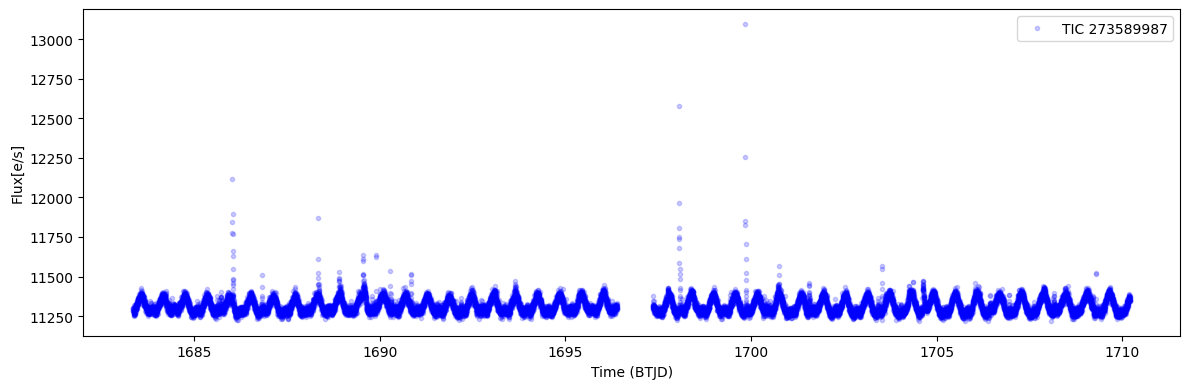

In [11]:
#plotting raw data (pdcsap_flux)
plt.figure(figsize=(12,4))
plt.plot(time, flux, '.', alpha=0.2, color = "blue", label="TIC 273589987")
plt.xlabel("Time (BTJD)")
plt.ylabel("Flux[e/s]")
plt.legend()
plt.tight_layout()
plt.show()


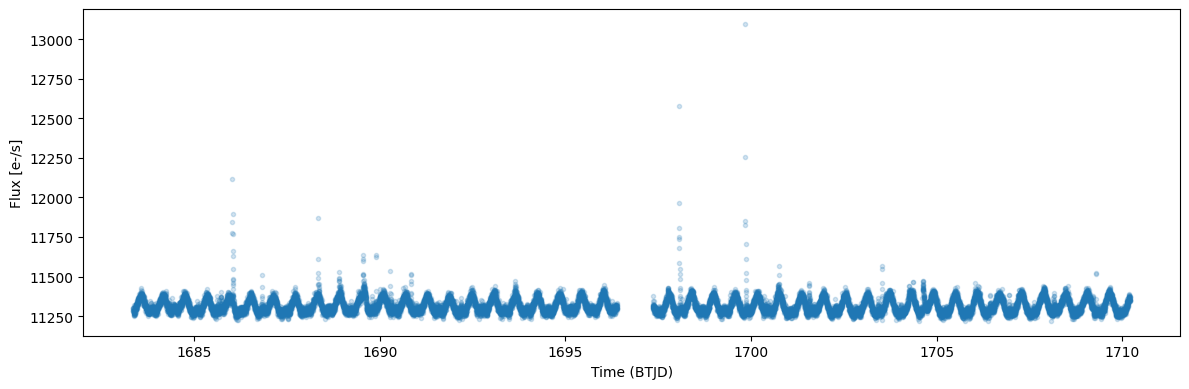

In [12]:
#plotting quality data()
plt.figure(figsize=(12,4))
plt.plot(time_clean, flux_clean, '.', alpha=0.2)
plt.xlabel("Time (BTJD)")
plt.ylabel("Flux [e-/s]")
plt.tight_layout()
plt.show()


In [13]:
#counting bad and good  flags
total = len(flux)
good = np.sum(quality == 0)
bad = np.sum(quality != 0)

print("Total:", total)
print("good:", good)
print("bads:", bad)

Total: 18409
good: 18409
bads: 0


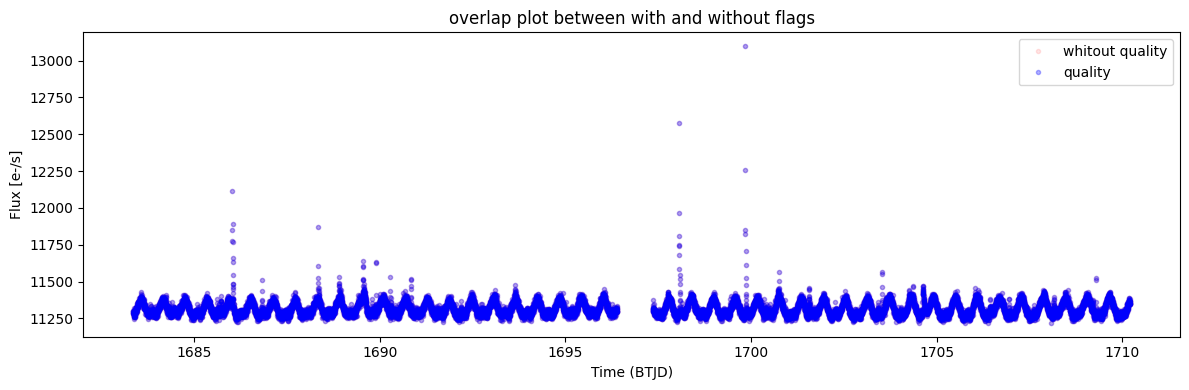

In [14]:
#overlap plot between with and without flags
plt.figure(figsize=(12,4))
plt.plot(time, flux, '.', alpha=0.1,color ="red", label="whitout quality")
plt.plot(time_clean, flux_clean, '.', alpha=0.3, color="blue", label="quality")
plt.xlabel("Time (BTJD)")
plt.ylabel("Flux [e-/s]")
plt.title("overlap plot between with and without flags")
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
## looking for Nan in clean data
print("NaN in time:", np.sum(~np.isfinite(time_clean)))
print("NaN in flux:", np.sum(~np.isfinite(flux_clean)))

NaN in time: 0
NaN in flux: 0


In [16]:
## outliers
# Inputsnumpy arrays)
time_arr = np.asarray(time_clean)            # days (BTJD)
flux_arr = np.asarray(flux_clean)            # e-/s (sin units)
ferr_arr  = np.asarray(flux_error_clean)
# 2) Detectar outliers con sigma_clip (conservador)
sigma_detect = 3.0           # conservador; baja a 3.0 si querés más agresivo
clip = sigma_clip(flux_arr, sigma=sigma_detect, maxiters=3, cenfunc='median', stdfunc='std')
outlier_mask = clip.mask     # True = outlier
print("Outliers detected (mask True):", np.sum(outlier_mask))

Outliers detected (mask True): 122


In [17]:
# Máscara de puntos buenos
good_mask = ~outlier_mask   # True = datos buenos

# Filtrar time, flux, flux_error
time_no_outliers  = time_arr[good_mask]
flux_no_outliers  = flux_arr[good_mask]
ferr_no_outliers  = ferr_arr[good_mask]

print("Original:", len(time_arr))
print("after eliminate outliers:", len(time_no_outliers))
print("Eliminates:", np.sum(outlier_mask))

Original: 18409
after eliminate outliers: 18287
Eliminates: 122


In [18]:
len(time_no_outliers) == len(flux_no_outliers) == len(ferr_no_outliers) #"time, flux, flux_err same length"

True

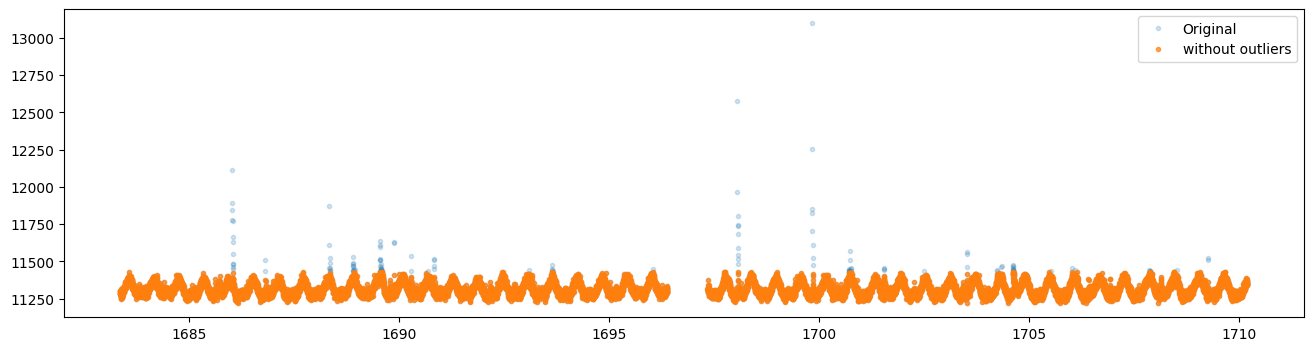

In [19]:
plt.figure(figsize=(16,4))
plt.plot(time_arr, flux_arr, '.', alpha=0.2, label='Original')
plt.plot(time_no_outliers, flux_no_outliers, '.', alpha=0.7, label='without outliers')
plt.legend()
plt.show()

S/N mean: 755.9474
S/N median: 761.02844
S/N minimun: 696.0689
S/N maximun: 802.58105


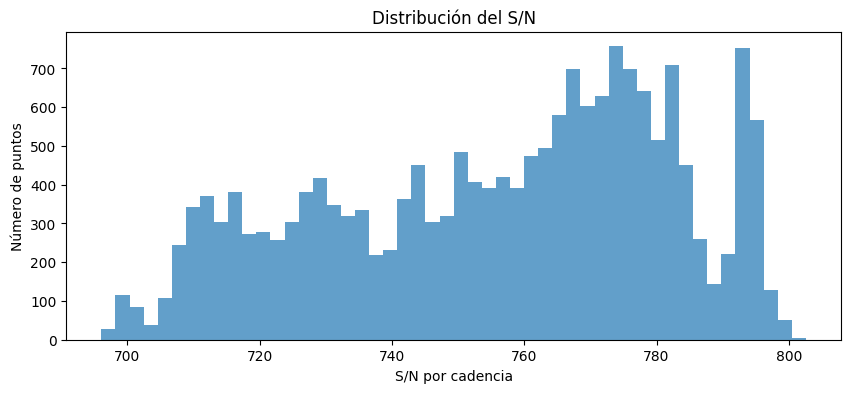

In [20]:
## calculate the S/N
snr = flux_no_outliers / ferr_no_outliers
print("S/N mean:", np.mean(snr))
print("S/N median:", np.median(snr))
print("S/N minimun:", np.min(snr))
print("S/N maximun:", np.max(snr))
snr_array = np.array(snr)
plt.figure(figsize=(10,4))
plt.hist(snr_array, bins=50, alpha=0.7)
plt.xlabel("S/N por cadencia")
plt.ylabel("Número de puntos")
plt.title("Distribución del S/N")
plt.show()


Periodo mejor estimado: 0.59251 días
FAP: 0.0


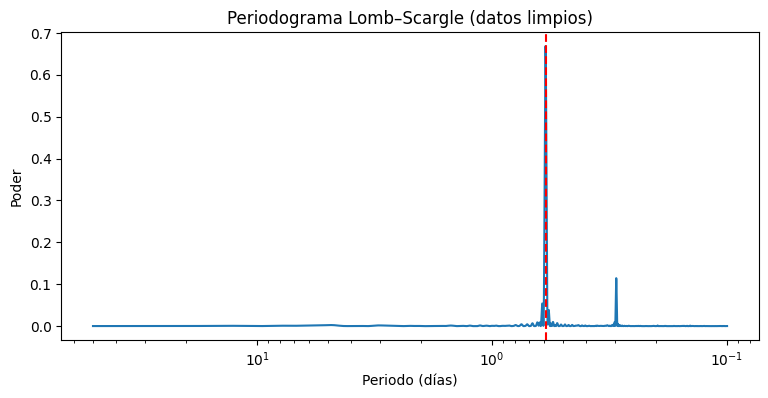

In [21]:



# --- Rango de periodos ---
minP, maxP = 0.1, 50.0
minF, maxF = 1/maxP, 1/minP

# --- Lomb–Scargle ---
Nf = 20000
freq = np.linspace(minF, maxF, Nf)
ls = LombScargle(time_no_outliers, flux_no_outliers, ferr_no_outliers)
power = ls.power(freq)

best_idx = np.argmax(power)
best_freq = freq[best_idx]
best_period = 1.0 / best_freq

print(f"Periodo mejor estimado: {best_period:.5f} días")

# --- Significancia ---
fap = ls.false_alarm_probability(power[best_idx])
print("FAP:", fap)

# --- Gráfico ---
periods = 1/freq
plt.figure(figsize=(9,4))
plt.plot(periods, power)
plt.xscale("log")
plt.gca().invert_xaxis()
plt.axvline(best_period, color="red", linestyle="--")
plt.xlabel("Periodo (días)")
plt.ylabel("Poder")
plt.title("Periodograma Lomb–Scargle (datos limpios)")
plt.show()


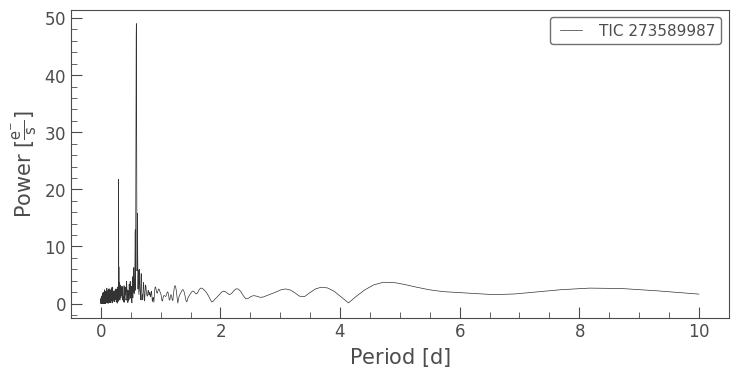

0.59291558563365 d


In [22]:
##another way to estimate period
pg = lc14.to_periodogram(maximum_period=10)

pg.plot(view='period');
plt.show()
print(pg.period_at_max_power)

In [23]:
##Normalization of the flux with the mean


Máximo de la phased mean LC: 11387.402
Ocurre en fase: 0.44166666666666665


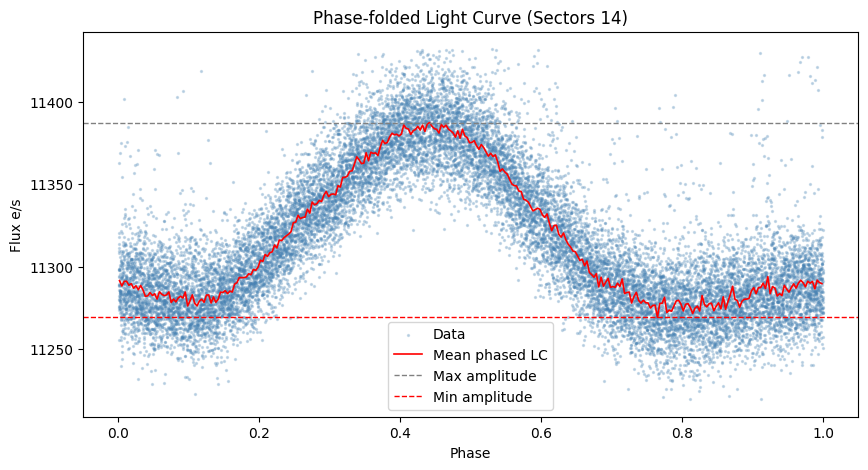

In [24]:
# 1) Phase folding

phase = (time_no_outliers /best_period )%1

#sorting
# 2) Ordenar
order = np.argsort(phase)
phase_sorted = phase[order]
#flux_sorted  = flux_norm[order]
flux_sorted  = flux_no_outliers[order]
nbins = 300  # resolución fina como en el paper
bins = np.linspace(0, 1, nbins+1)

digitized = np.digitize(phase_sorted, bins)
binned_phase = 0.5 * (bins[1:] + bins[:-1])
binned_flux  = np.array([np.mean(flux_sorted[digitized == i]) 
                         if np.any(digitized == i) else np.nan
                         for i in range(1, nbins+1)])
#max amplitude
max_amp = np.nanmax(binned_flux)
phase_at_max = binned_phase[np.nanargmax(binned_flux)]

#min amplitude
min_amp = np.nanmin(binned_flux)

print("Máximo de la phased mean LC:", max_amp)
print("Ocurre en fase:", phase_at_max)
plt.figure(figsize=(10,5))
plt.scatter(phase_sorted, flux_sorted, s=2, alpha=0.25, label="Data", color="steelblue")
plt.plot(binned_phase, binned_flux, color="red", lw=1.2, label="Mean phased LC")

plt.axhline(max_amp, color="gray", linestyle="--", lw=1,    label="Max amplitude ")
plt.axhline(min_amp, color="red", linestyle="--", lw=1,    label="Min amplitude ")

plt.xlabel("Phase")
plt.ylabel("Flux e/s")
plt.title("Phase-folded Light Curve (Sectors 14)")
plt.legend()
plt.show()







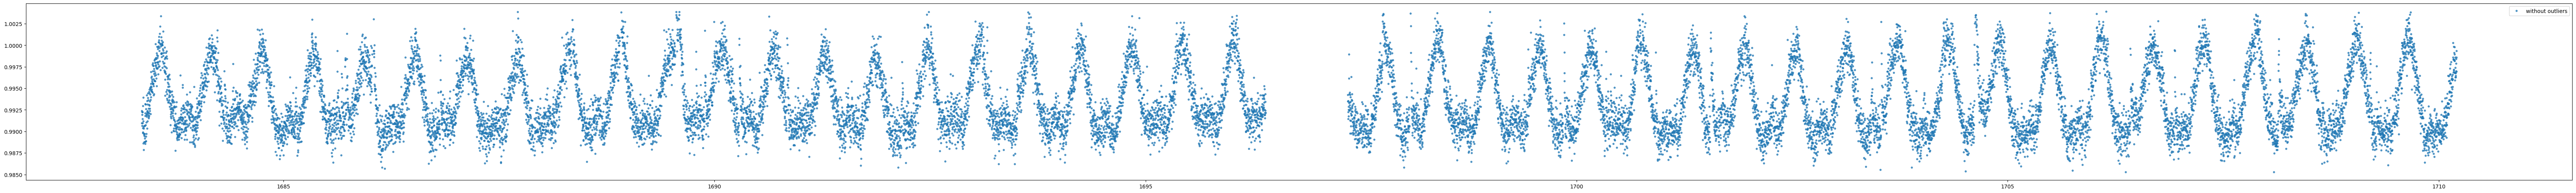

In [53]:
flux_norm = flux_no_outliers/max_amp
plt.figure(figsize=(86,6))
plt.plot(time_no_outliers, flux_norm, '.', alpha=0.7, label='without outliers')
plt.legend()
plt.show()

In [26]:
# Verificar valores actuales
print(f"max_amp (de phased LC): {max_amp:.3f} e/s")
print(f"flux_norm.max(): {flux_norm.max():.6f}")
print(f"flux_norm.min(): {flux_norm.min():.6f}")

# Aplicar corrección para que máximo = 1
flux_tess_scaled = flux_norm / flux_norm.max()

print(f"\nDespués de escalar:")
print(f"flux_tess_scaled.max(): {flux_tess_scaled.max():.6f}")
print(f"flux_tess_scaled.min(): {flux_tess_scaled.min():.6f}")

# --- Filtrar por rango ---
mask = (time_no_outliers >= 1701.78) & (time_no_outliers <= 1704.825)

time_slice = time_no_outliers[mask]
flux_slice = flux_tess_scaled[mask]  # Usar el CORREGIDO

# --- Guardar en un CSV ---
df = pd.DataFrame({
    "Time": time_slice,
    "flux_normalized": flux_slice  # Ahora máximo = 1
})

df.to_csv("tess_curve.csv", index=False)

# Verificación final
print(f"\nVerificación del archivo guardado:")
print(f"Máximo en CSV: {df['flux_normalized'].max():.6f}")
print(f"Mínimo en CSV: {df['flux_normalized'].min():.6f}")
print(f"Diferencia al máximo ideal 1: {abs(df['flux_normalized'].max() - 1):.6f}")
print(f"¿Es ~1? {abs(df['flux_normalized'].max() - 1) < 0.0001}")

print(f"\nTotal de puntos guardados: {len(df)}")

max_amp (de phased LC): 11387.402 e/s
flux_norm.max(): 1.003905
flux_norm.min(): 0.985277

Después de escalar:
flux_tess_scaled.max(): 1.000000
flux_tess_scaled.min(): 0.981445

Verificación del archivo guardado:
Máximo en CSV: 0.999613
Mínimo en CSV: 0.981549
Diferencia al máximo ideal 1: 0.000387
¿Es ~1? False

Total de puntos guardados: 2160


In [27]:
## normalize amplitude
norm_amplitude = 1-(min_amp/max_amp)
print(norm_amplitude)

0.010363459587097168


In [28]:
## percentage spottedness of the star
spottedness_star = 100*norm_amplitude*(1-(spot_temperature/star_temperature)**4)**-1
print(spottedness_star)

2.625363498978606


In [29]:
print(f"Max TESS normalized: {flux_norm.max():.6f}")
print(f"Mean TESS normalized: {flux_norm.mean():.6f}")
print(f"Min TESS normalized: {flux_norm.min():.6f}")


Max TESS normalized: 1.003905
Mean TESS normalized: 0.993625
Min TESS normalized: 0.985277


In [30]:
# Tu CSV ya está correcto
# El máximo dentro de tu rango es 0.999613, que es físicamente realista
# Significa que en ese intervalo, la estrella NUNCA está completamente sin manchas

print("✅ Tu archivo CSV es correcto para comparación con simulaciones")
print("   El flujo máximo en tu ventana temporal es 0.999613")
print("   Esto representa el estado 'más limpio' de manchas en ese período")

✅ Tu archivo CSV es correcto para comparación con simulaciones
   El flujo máximo en tu ventana temporal es 0.999613
   Esto representa el estado 'más limpio' de manchas en ese período


In [67]:


# Load TESS light curve
base_curve = pd.read_csv('tess_curve.csv')
tess_flux = base_curve["flux_normalized"]
tess_time = base_curve["Time"]

# Load 
simulated = pd.read_csv('test1/lat_0lon_0radii5.csv')
sim_flux =simulated["flux_normalized"]
sim_time = simulated["Days"]

#calculate MSE
mse = mean_squared_error(tess_flux, sim_flux)
print (mse)

7.886551702615382e-05


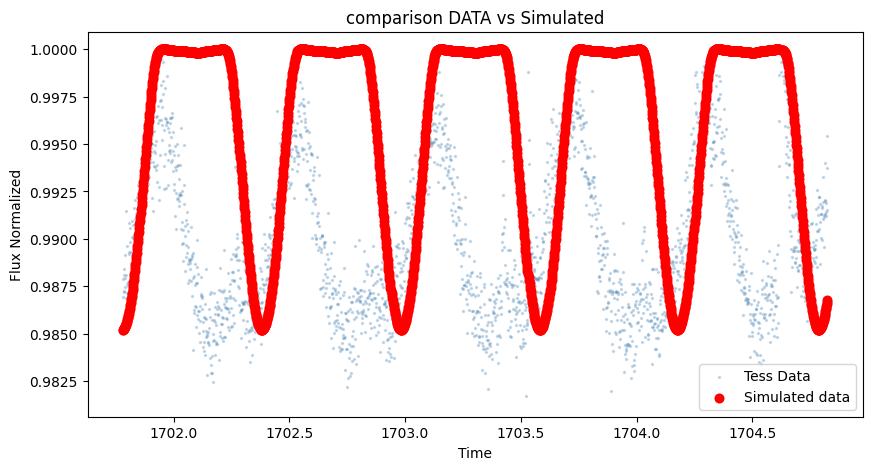

In [70]:
## ploting 

plt.figure(figsize=(10,5))
plt.scatter(tess_time, tess_flux, s=2, alpha=0.25, label="Tess Data", color="steelblue")
plt.scatter(tess_time, sim_flux, color="red", lw=1.2, label="Simulated data")


plt.xlabel("Time")
plt.ylabel("Flux Normalized")
plt.title("comparison DATA vs Simulated")
plt.legend()
plt.show()


In [62]:
mse = mean_squared_error(tess_flux, sim_flux)
print(mse)

7.886551702615382e-05



Top 5 likely light curve:

1. Archivo: lat_50lon_180radii5.csv, Lat: 50.0, Lon: 180.0, Rad: 5.0, MSE: 0.0000592816
2. Archivo: lat_40lon_180radii5.csv, Lat: 40.0, Lon: 180.0, Rad: 5.0, MSE: 0.0000643393
3. Archivo: lat_30lon_180radii5.csv, Lat: 30.0, Lon: 180.0, Rad: 5.0, MSE: 0.0000666265
4. Archivo: lat_20lon_180radii5.csv, Lat: 20.0, Lon: 180.0, Rad: 5.0, MSE: 0.0000671708
5. Archivo: lat_10lon_180radii5.csv, Lat: 10.0, Lon: 180.0, Rad: 5.0, MSE: 0.0000676178


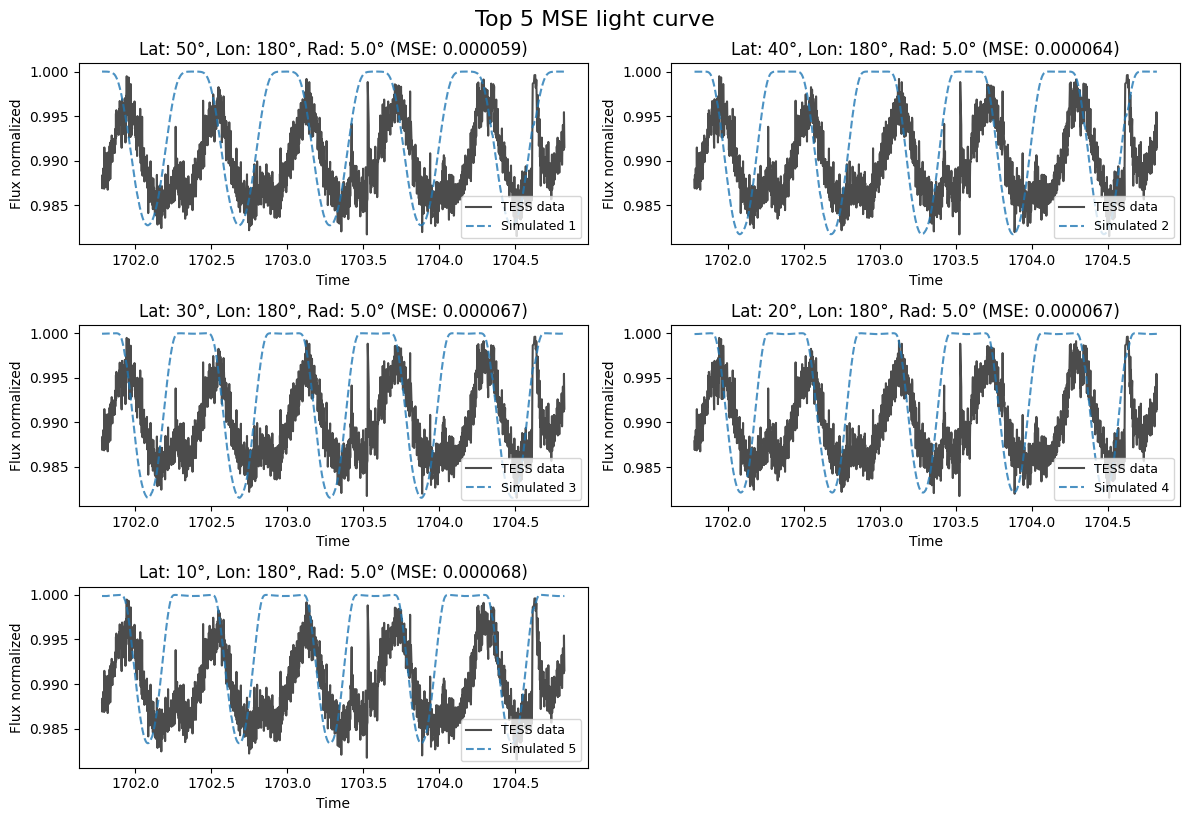


✨ MEJOR AJUSTE GLOBAL:
   Archivo: lat_50lon_180radii5.csv
   Parámetros: Lat=50.0°, Lon=180.0°, Rad=5.0°
   MSE: 0.0000592816


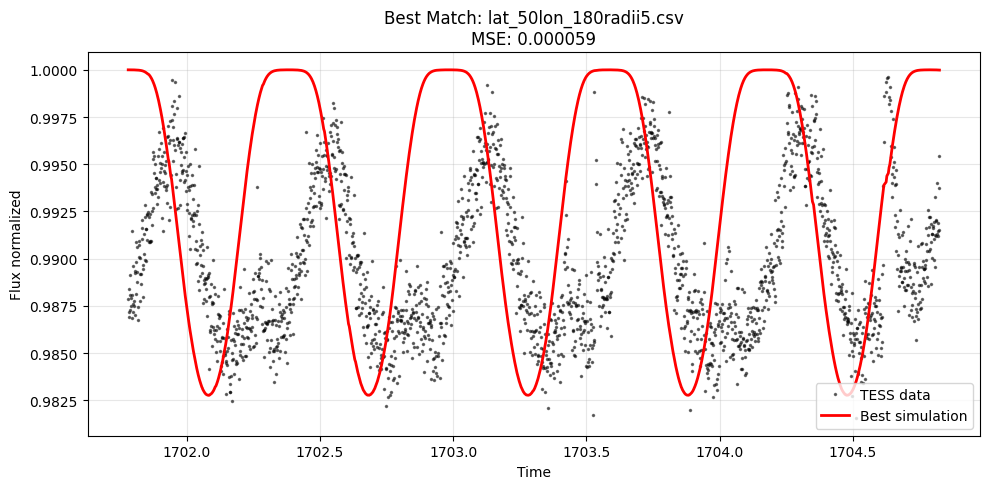

In [57]:


# Asegúrate de que base_flux y base_time estén definidos


#comparison with all lc
sim_folder = 'test1'
results = []

for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        sim_curve = pd.read_csv(path)
        sim_flux = sim_curve['flux_normalized'].values
        

        mse = mean_squared_error(tess_flux, sim_flux)
        
        # Extraer parámetros del nombre (formato: lat_0lon_0radii3.csv)
        # Quitar extensión
        name = file.replace('.csv', '')
        
        # Extraer latitud (después de 'lat_' y antes de 'lon_')
        lat_start = name.find('lat_') + 4
        lat_end = name.find('lon_')
        lat_str = name[lat_start:lat_end]
        lat = float(lat_str)
        
        # Extraer longitud (después de 'lon_' y antes de 'radii')
        lon_start = name.find('lon_') + 4
        lon_end = name.find('radii')
        lon_str = name[lon_start:lon_end]
        lon = float(lon_str)
        
        # Extraer radio (después de 'radii')
        rad_start = name.find('radii') + 5
        rad_str = name[rad_start:]
        rad = float(rad_str)
        
        results.append({
            'file': file,
            'lat': lat,
            'lon': lon,
            'rad': rad,
            'mse': mse,
            'flux': sim_flux
        })

# Paso 4: Ordenar y mostrar top 5
top5 = sorted(results, key=lambda x: x['mse'])[:5]

print("\nTop 5 likely light curve:\n")
for i, r in enumerate(top5, 1):
    print(f"{i}. Archivo: {r['file']}, Lat: {r['lat']:.1f}, Lon: {r['lon']:.1f}, Rad: {r['rad']:.1f}, MSE: {r['mse']:.10f}")

# Paso 5: Graficar comparaciones
plt.figure(figsize=(12, 8))
for i, r in enumerate(top5, 1):
    plt.subplot(3, 2, i)
    plt.plot(tess_time, tess_flux, label='TESS data', color='black', alpha=0.7)
    
    # Asegurar que las curvas tengan la misma longitud para graficar
    min_len = min(len(tess_time), len(r['flux']))
    
    plt.plot(tess_time[:min_len], r['flux'][:min_len], 
             label=f"Simulated {i}", linestyle='--', alpha=0.8)
    plt.title(f"Lat: {r['lat']:.0f}°, Lon: {r['lon']:.0f}°, Rad: {r['rad']:.1f}° (MSE: {r['mse']:.6f})")
    plt.xlabel("Time")
    plt.ylabel("Flux normalized")
    plt.legend(fontsize=9)

plt.tight_layout()
plt.suptitle("Top 5 MSE light curve", fontsize=16, y=1.02)
plt.show()

# También mostrar el mejor resultado por separado
if results:
    best = min(results, key=lambda x: x['mse'])
    print(f"\n✨ MEJOR AJUSTE GLOBAL:")
    print(f"   Archivo: {best['file']}")
    print(f"   Parámetros: Lat={best['lat']:.1f}°, Lon={best['lon']:.1f}°, Rad={best['rad']:.1f}°")
    print(f"   MSE: {best['mse']:.10f}")
    
    # Graficar el mejor ajuste por separado
    plt.figure(figsize=(10, 5))
    min_len = min(len(tess_time), len(best['flux']))
    plt.plot(tess_time[:min_len], tess_flux[:min_len], 'k.', 
             alpha=0.5, label='TESS data', markersize=3)
    plt.plot(tess_time[:min_len], best['flux'][:min_len], 'r-', 
             linewidth=2, label='Best simulation')
    plt.title(f"Best Match: {best['file']}\nMSE: {best['mse']:.6f}")
    plt.xlabel("Time")
    plt.ylabel("Flux normalized")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Analizando carpeta: test1
Número de archivos en la carpeta: 214

Procesados 210 archivos CSV.

RESUMEN ESTADÍSTICO DE RESIDUALES

Estadísticas generales (todos los archivos):
MSE promedio: 0.0002157178
MSE mínimo: 0.0000592816
MSE máximo: 0.0007359191
Desviación estándar de MSE: 0.0001867084
Std promedio de residuales: 0.01082878

TOP 5 MEJORES AJUSTES (MENOR MSE)

1. Archivo: lat_50lon_180radii5.csv
   Parámetros: Lat=50.0°, Lon=180.0°, Rad=5.0°
   MSE: 0.0000592816
   Residuales - Media: -0.00354824, Std: 0.00683313, RMS: 0.00769946
   Rango: [-0.01819061, 0.01819061], Asimetría: 0.0019, Curtosis: -1.3111

2. Archivo: lat_40lon_180radii5.csv
   Parámetros: Lat=40.0°, Lon=180.0°, Rad=5.0°
   MSE: 0.0000643393
   Residuales - Media: -0.00371580, Std: 0.00710860, RMS: 0.00802118
   Rango: [-0.01825713, 0.01825713], Asimetría: 0.0931, Curtosis: -1.3089

3. Archivo: lat_30lon_180radii5.csv
   Parámetros: Lat=30.0°, Lon=180.0°, Rad=5.0°
   MSE: 0.0000666265
   Residuales - Media: -0.004052

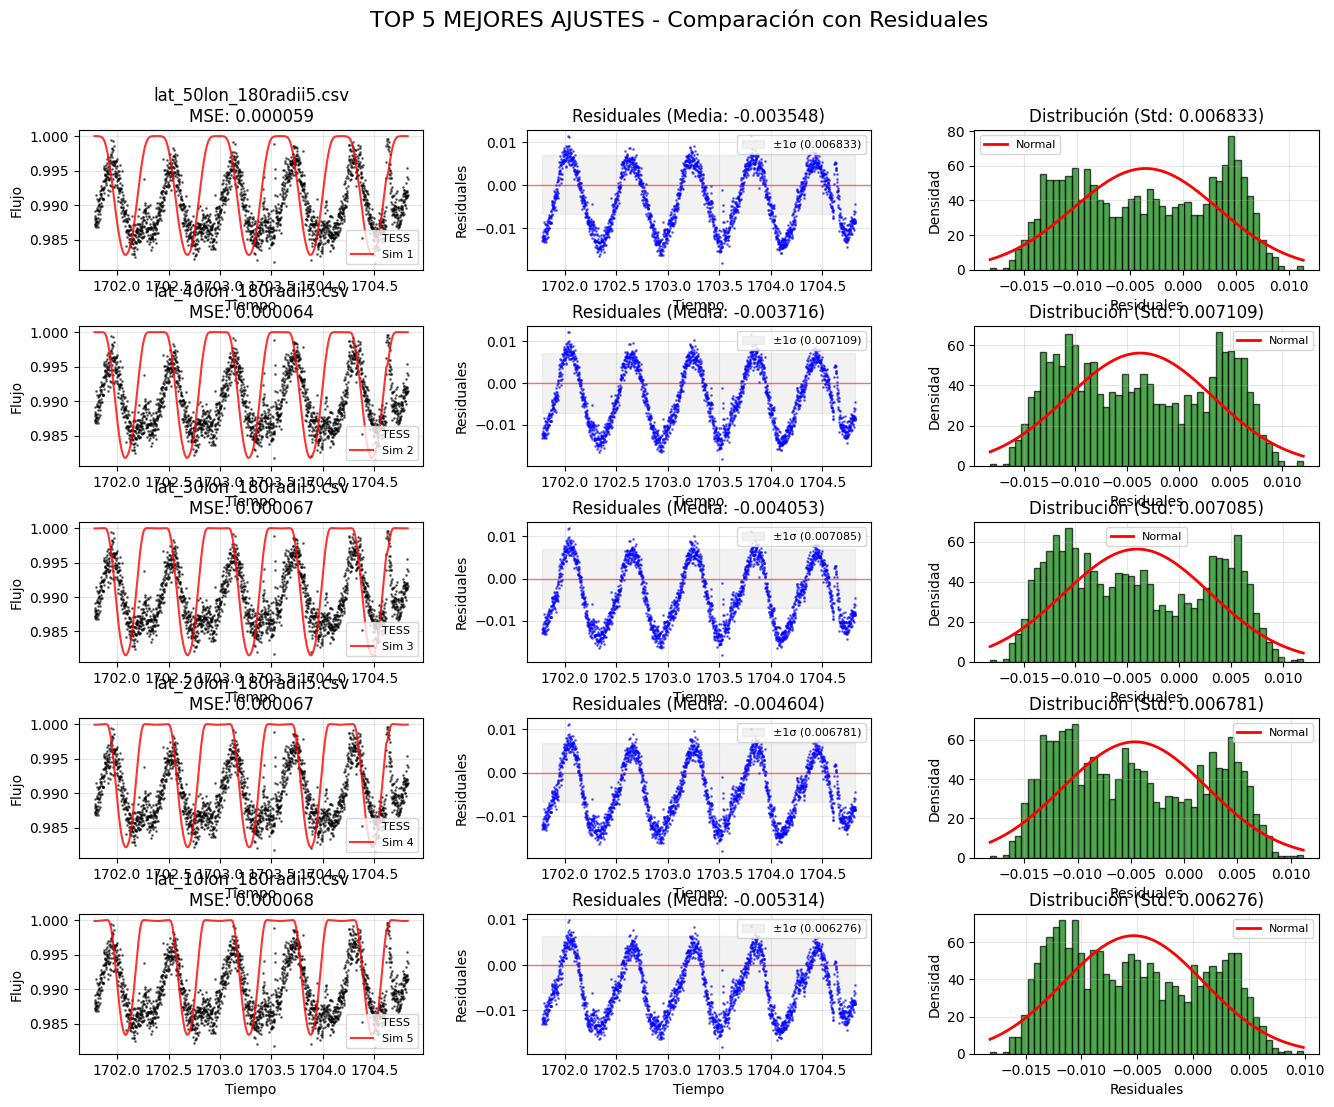

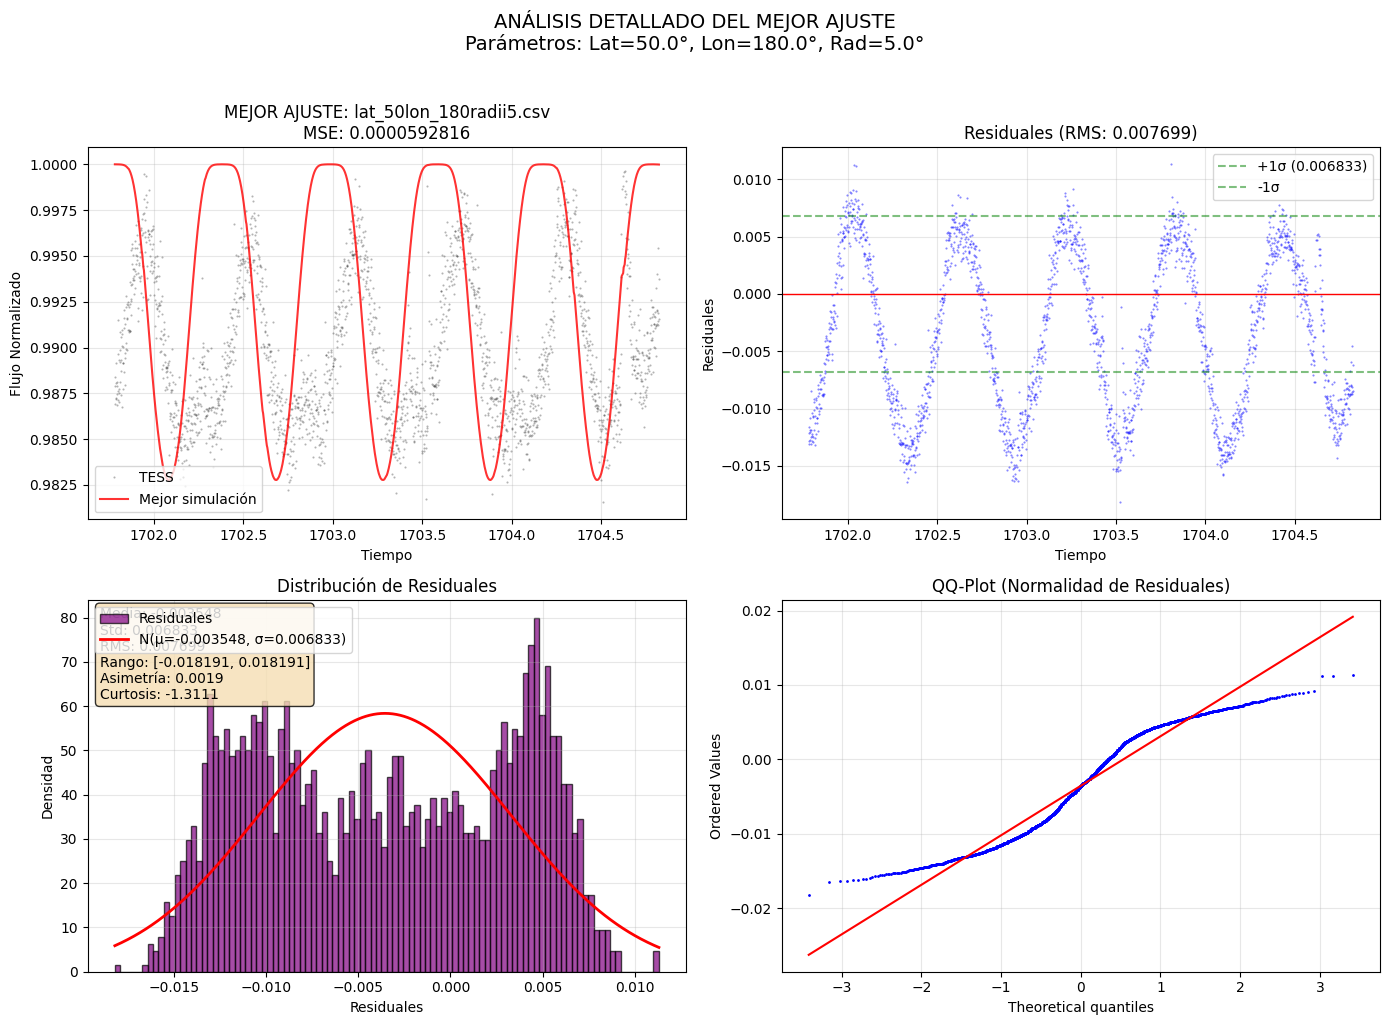

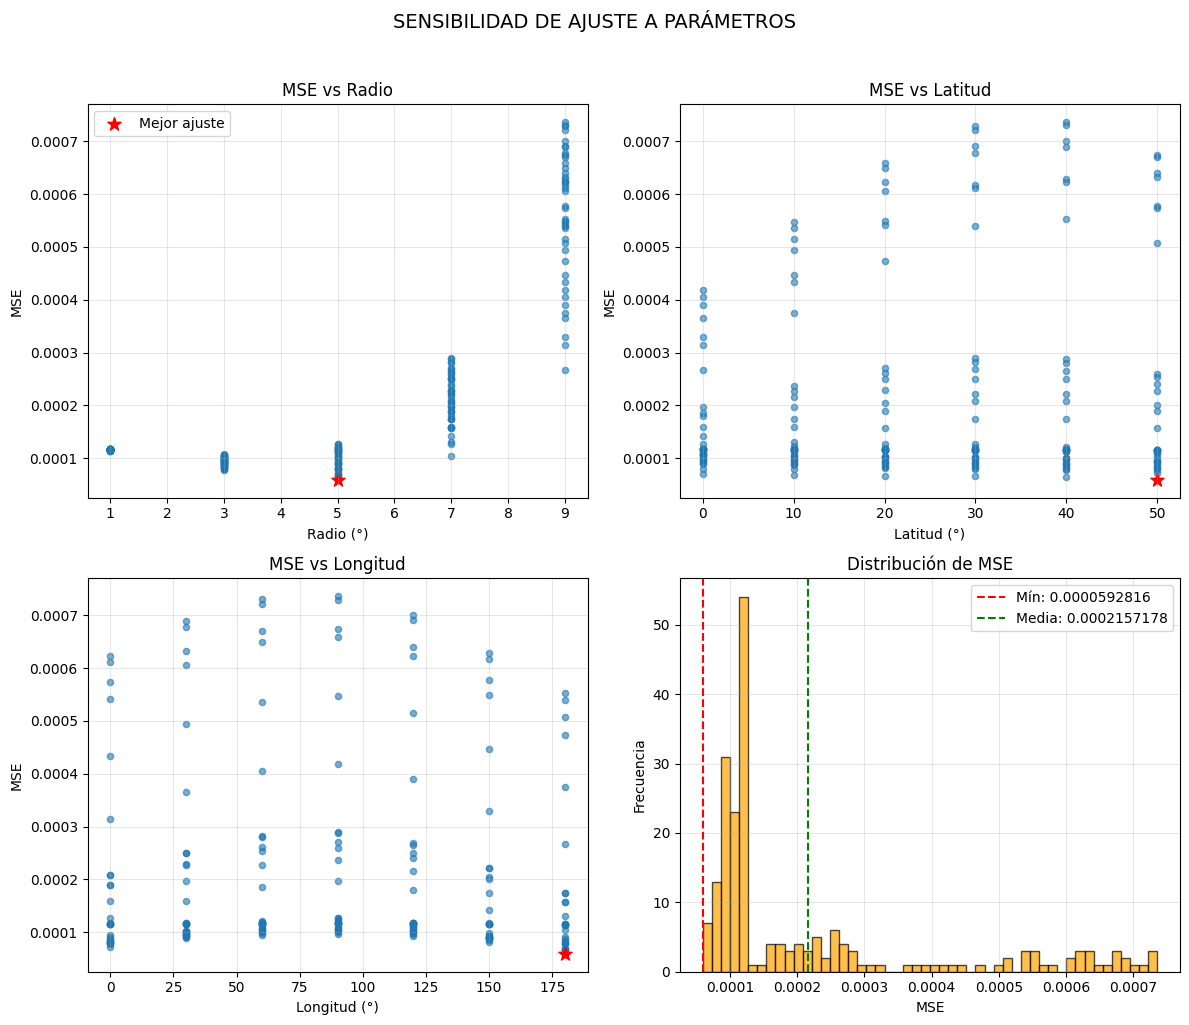


TABLA RESUMEN - TOP 10 AJUSTES

#   Archivo                 Lat    Lon    Rad             MSE      Res_Std      Res_RMS
-------------------------------------------------------------------------------------
1   lat_50lon_180radii5.csv   50.0  180.0    5.0    0.0000592816   0.00683313   0.00769946
2   lat_40lon_180radii5.csv   40.0  180.0    5.0    0.0000643393   0.00710860   0.00802118
3   lat_30lon_180radii5.csv   30.0  180.0    5.0    0.0000666265   0.00708536   0.00816251
4   lat_20lon_180radii5.csv   20.0  180.0    5.0    0.0000671708   0.00678071   0.00819578
5   lat_10lon_180radii5.csv   10.0  180.0    5.0    0.0000676178   0.00627566   0.00822300
6   lat_0lon_180radii5.csv    0.0  180.0    5.0    0.0000694079   0.00563303   0.00833114
7   lat_50lon_0radii5.csv   50.0    0.0    5.0    0.0000724883   0.00783164   0.00851401
8   lat_50lon_180radii3.csv   50.0  180.0    3.0    0.0000782538   0.00413990   0.00884612
9   lat_40lon_0radii5.csv   40.0    0.0    5.0    0.0000783517   0.0

In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ==============================================
# CONFIGURACIÓN DE DATOS (ASUMIENDO QUE YA EXISTEN)
# ==============================================
# Asegúrate de que estas variables estén definidas:
# base_time, base_flux, sim_folder = 'test1'

# ==============================================
# FUNCIONES AUXILIARES
# ==============================================

def calculate_residual_stats(base_flux, sim_flux):
    """
    Calcula estadísticas detalladas de los residuales.
    """
    # Asegurar misma longitud
    min_len = min(len(base_flux), len(sim_flux))
    base_cut = base_flux[:min_len]
    sim_cut = sim_flux[:min_len]
    
    # Calcular residuales
    residuals = base_cut - sim_cut
    
    # Estadísticas
    stats_dict = {
        'mse': mean_squared_error(base_cut, sim_cut),
        'residuals': residuals,
        'mean': np.mean(residuals),
        'std': np.std(residuals),
        'rms': np.sqrt(np.mean(residuals**2)),
        'max': np.max(np.abs(residuals)),
        'min': np.min(residuals),
        'range': np.ptp(residuals),
        'skewness': stats.skew(residuals),
        'kurtosis': stats.kurtosis(residuals),
        'mad': np.median(np.abs(residuals - np.median(residuals)))  # MAD
    }
    
    return stats_dict

def parse_filename(filename):
    """
    Extrae parámetros del nombre del archivo.
    Formato esperado: lat_Xlon_YradiiZ.csv
    """
    # Quitar extensión
    name = filename.replace('.csv', '')
    
    # Extraer latitud
    lat_start = name.find('lat_') + 4
    lat_end = name.find('lon_')
    lat_str = name[lat_start:lat_end]
    
    # Extraer longitud
    lon_start = name.find('lon_') + 4
    lon_end = name.find('radii')
    lon_str = name[lon_start:lon_end]
    
    # Extraer radio
    rad_start = name.find('radii') + 5
    rad_str = name[rad_start:]
    
    try:
        lat = float(lat_str)
        lon = float(lon_str)
        rad = float(rad_str)
    except:
        lat = lon = rad = 0.0
    
    return lat, lon, rad

# ==============================================
# ANÁLISIS PRINCIPAL
# ==============================================

print(f"Analizando carpeta: {sim_folder}")
print(f"Número de archivos en la carpeta: {len(os.listdir(sim_folder))}")

results = []

for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        
        try:
            # Cargar curva simulada
            sim_curve = pd.read_csv(path)
            sim_flux = sim_curve['flux_normalized'].values
            
            # Calcular estadísticas de residuales
            res_stats = calculate_residual_stats(tess_flux, sim_flux)
            
            # Extraer parámetros del nombre
            lat, lon, rad = parse_filename(file)
            
            # Guardar resultados
            results.append({
                'file': file,
                'lat': lat,
                'lon': lon,
                'rad': rad,
                'mse': res_stats['mse'],
                'residuals': res_stats['residuals'],
                'res_mean': res_stats['mean'],
                'res_std': res_stats['std'],
                'res_rms': res_stats['rms'],
                'res_max': res_stats['max'],
                'res_min': res_stats['min'],
                'res_range': res_stats['range'],
                'res_skew': res_stats['skewness'],
                'res_kurt': res_stats['kurtosis'],
                'flux': sim_flux
            })
            
        except Exception as e:
            print(f"Error procesando {file}: {e}")

print(f"\nProcesados {len(results)} archivos CSV.")

# Ordenar por MSE
results_sorted = sorted(results, key=lambda x: x['mse'])
top5 = results_sorted[:5]
worst5 = results_sorted[-5:]

# ==============================================
# 1. RESUMEN ESTADÍSTICO
# ==============================================

print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO DE RESIDUALES")
print("="*80)

print(f"\nEstadísticas generales (todos los archivos):")
all_mse = [r['mse'] for r in results]
all_std = [r['res_std'] for r in results]

print(f"MSE promedio: {np.mean(all_mse):.10f}")
print(f"MSE mínimo: {np.min(all_mse):.10f}")
print(f"MSE máximo: {np.max(all_mse):.10f}")
print(f"Desviación estándar de MSE: {np.std(all_mse):.10f}")
print(f"Std promedio de residuales: {np.mean(all_std):.8f}")

# ==============================================
# 2. TOP 5 MEJORES AJUSTES
# ==============================================

print("\n" + "="*80)
print("TOP 5 MEJORES AJUSTES (MENOR MSE)")
print("="*80)

for i, r in enumerate(top5, 1):
    print(f"\n{i}. Archivo: {r['file']}")
    print(f"   Parámetros: Lat={r['lat']:.1f}°, Lon={r['lon']:.1f}°, Rad={r['rad']:.1f}°")
    print(f"   MSE: {r['mse']:.10f}")
    print(f"   Residuales - Media: {r['res_mean']:.8f}, Std: {r['res_std']:.8f}, RMS: {r['res_rms']:.8f}")
    print(f"   Rango: [{r['res_min']:.8f}, {r['res_max']:.8f}], Asimetría: {r['res_skew']:.4f}, Curtosis: {r['res_kurt']:.4f}")

# ==============================================
# 3. GRÁFICAS DE COMPARACIÓN - TOP 5
# ==============================================

fig = plt.figure(figsize=(16, 12))

# Configurar subplots
gs = plt.GridSpec(5, 3, figure=fig, hspace=0.4, wspace=0.3)

for i, r in enumerate(top5, 0):
    # Obtener longitud mínima
    min_len = min(len(tess_time), len(r['flux']))
    time_cut = tess_time[:min_len]
    base_cut = tess_flux[:min_len]
    sim_cut = r['flux'][:min_len]
    residuals = r['residuals'][:min_len]
    
    # 1. Comparación de curvas (columna 1)
    ax1 = fig.add_subplot(gs[i, 0])
    ax1.plot(time_cut, base_cut, 'k.', alpha=0.5, markersize=2, label='TESS')
    ax1.plot(time_cut, sim_cut, 'r-', linewidth=1.5, alpha=0.8, label=f'Sim {i+1}')
    ax1.set_title(f"{r['file']}\nMSE: {r['mse']:.6f}")
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Flujo')
    ax1.legend(fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # 2. Residuales vs tiempo (columna 2)
    ax2 = fig.add_subplot(gs[i, 1])
    ax2.plot(time_cut, residuals, 'b.', alpha=0.5, markersize=2)
    ax2.axhline(y=0, color='r', linestyle='-', linewidth=1, alpha=0.5)
    ax2.fill_between([time_cut.min(), time_cut.max()], 
                     -r['res_std'], r['res_std'], 
                     alpha=0.1, color='gray', label=f'±1σ ({r["res_std"]:.6f})')
    ax2.set_xlabel('Tiempo')
    ax2.set_ylabel('Residuales')
    ax2.set_title(f'Residuales (Media: {r["res_mean"]:.6f})')
    ax2.legend(fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    # 3. Histograma de residuales (columna 3)
    ax3 = fig.add_subplot(gs[i, 2])
    ax3.hist(residuals, bins=50, alpha=0.7, color='green', edgecolor='black', density=True)
    # Añadir curva normal teórica
    x = np.linspace(residuals.min(), residuals.max(), 100)
    y = stats.norm.pdf(x, r['res_mean'], r['res_std'])
    ax3.plot(x, y, 'r-', linewidth=2, label='Normal')
    ax3.set_xlabel('Residuales')
    ax3.set_ylabel('Densidad')
    ax3.set_title(f'Distribución (Std: {r["res_std"]:.6f})')
    ax3.legend(fontsize=8)
    ax3.grid(True, alpha=0.3)

plt.suptitle('TOP 5 MEJORES AJUSTES - Comparación con Residuales', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# ==============================================
# 4. MEJOR AJUSTE INDIVIDUAL
# ==============================================

if results_sorted:
    best = results_sorted[0]
    min_len = min(len(tess_time), len(best['flux']))
    time_cut = tess_time[:min_len]
    base_cut = tess_flux[:min_len]
    sim_cut = best['flux'][:min_len]
    residuals = best['residuals'][:min_len]
    
    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Comparación completa
    axes2[0, 0].plot(time_cut, base_cut, 'k.', alpha=0.3, markersize=1, label='TESS')
    axes2[0, 0].plot(time_cut, sim_cut, 'r-', linewidth=1.5, alpha=0.8, label='Mejor simulación')
    axes2[0, 0].set_xlabel('Tiempo')
    axes2[0, 0].set_ylabel('Flujo Normalizado')
    axes2[0, 0].set_title(f'MEJOR AJUSTE: {best["file"]}\nMSE: {best["mse"]:.10f}')
    axes2[0, 0].legend()
    axes2[0, 0].grid(True, alpha=0.3)
    
    # 2. Residuales vs tiempo
    axes2[0, 1].plot(time_cut, residuals, 'b.', alpha=0.5, markersize=1)
    axes2[0, 1].axhline(y=0, color='r', linestyle='-', linewidth=1)
    axes2[0, 1].axhline(y=best['res_std'], color='g', linestyle='--', alpha=0.5, label=f'+1σ ({best["res_std"]:.6f})')
    axes2[0, 1].axhline(y=-best['res_std'], color='g', linestyle='--', alpha=0.5, label=f'-1σ')
    axes2[0, 1].set_xlabel('Tiempo')
    axes2[0, 1].set_ylabel('Residuales')
    axes2[0, 1].set_title(f'Residuales (RMS: {best["res_rms"]:.6f})')
    axes2[0, 1].legend()
    axes2[0, 1].grid(True, alpha=0.3)
    
    # 3. Histograma detallado
    axes2[1, 0].hist(residuals, bins=100, alpha=0.7, color='purple', 
                     edgecolor='black', density=True, label='Residuales')
    # Añadir curva normal
    x = np.linspace(residuals.min(), residuals.max(), 1000)
    y = stats.norm.pdf(x, best['res_mean'], best['res_std'])
    axes2[1, 0].plot(x, y, 'r-', linewidth=2, label=f'N(μ={best["res_mean"]:.6f}, σ={best["res_std"]:.6f})')
    
    # Estadísticas en texto
    stats_text = (f'Media: {best["res_mean"]:.6f}\n'
                  f'Std: {best["res_std"]:.6f}\n'
                  f'RMS: {best["res_rms"]:.6f}\n'
                  f'Rango: [{best["res_min"]:.6f}, {best["res_max"]:.6f}]\n'
                  f'Asimetría: {best["res_skew"]:.4f}\n'
                  f'Curtosis: {best["res_kurt"]:.4f}')
    
    axes2[1, 0].text(0.02, 0.98, stats_text, transform=axes2[1, 0].transAxes,
                     fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes2[1, 0].set_xlabel('Residuales')
    axes2[1, 0].set_ylabel('Densidad')
    axes2[1, 0].set_title('Distribución de Residuales')
    axes2[1, 0].legend()
    axes2[1, 0].grid(True, alpha=0.3)
    
    # 4. QQ-Plot para normalidad
    stats.probplot(residuals, dist="norm", plot=axes2[1, 1])
    axes2[1, 1].get_lines()[0].set_marker('.')
    axes2[1, 1].get_lines()[0].set_markersize(2)
    axes2[1, 1].get_lines()[0].set_markerfacecolor('blue')
    axes2[1, 1].get_lines()[1].set_color('red')
    axes2[1, 1].set_title('QQ-Plot (Normalidad de Residuales)')
    axes2[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle(f'ANÁLISIS DETALLADO DEL MEJOR AJUSTE\n'
                 f'Parámetros: Lat={best["lat"]:.1f}°, Lon={best["lon"]:.1f}°, Rad={best["rad"]:.1f}°',
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# ==============================================
# 5. ANÁLISIS DE SENSIBILIDAD A PARÁMETROS
# ==============================================

fig3, axes3 = plt.subplots(2, 2, figsize=(12, 10))

# Convertir a DataFrame para facilitar análisis
df_results = pd.DataFrame(results)

# 1. MSE vs Radio
if 'rad' in df_results.columns:
    axes3[0, 0].scatter(df_results['rad'], df_results['mse'], alpha=0.6, s=20)
    axes3[0, 0].set_xlabel('Radio (°)')
    axes3[0, 0].set_ylabel('MSE')
    axes3[0, 0].set_title('MSE vs Radio')
    axes3[0, 0].grid(True, alpha=0.3)
    # Resaltar el mejor
    if not df_results.empty:
        best_idx = df_results['mse'].idxmin()
        axes3[0, 0].scatter(df_results.loc[best_idx, 'rad'], 
                           df_results.loc[best_idx, 'mse'], 
                           color='red', s=100, marker='*', label='Mejor ajuste')
        axes3[0, 0].legend()

# 2. MSE vs Latitud
if 'lat' in df_results.columns:
    axes3[0, 1].scatter(df_results['lat'], df_results['mse'], alpha=0.6, s=20)
    axes3[0, 1].set_xlabel('Latitud (°)')
    axes3[0, 1].set_ylabel('MSE')
    axes3[0, 1].set_title('MSE vs Latitud')
    axes3[0, 1].grid(True, alpha=0.3)
    if not df_results.empty:
        axes3[0, 1].scatter(df_results.loc[best_idx, 'lat'], 
                           df_results.loc[best_idx, 'mse'], 
                           color='red', s=100, marker='*')

# 3. MSE vs Longitud
if 'lon' in df_results.columns:
    axes3[1, 0].scatter(df_results['lon'], df_results['mse'], alpha=0.6, s=20)
    axes3[1, 0].set_xlabel('Longitud (°)')
    axes3[1, 0].set_ylabel('MSE')
    axes3[1, 0].set_title('MSE vs Longitud')
    axes3[1, 0].grid(True, alpha=0.3)
    if not df_results.empty:
        axes3[1, 0].scatter(df_results.loc[best_idx, 'lon'], 
                           df_results.loc[best_idx, 'mse'], 
                           color='red', s=100, marker='*')

# 4. Distribución de MSE
axes3[1, 1].hist(df_results['mse'], bins=50, alpha=0.7, color='orange', 
                 edgecolor='black')
axes3[1, 1].axvline(x=df_results['mse'].min(), color='red', linestyle='--', 
                    label=f'Mín: {df_results["mse"].min():.10f}')
axes3[1, 1].axvline(x=df_results['mse'].mean(), color='green', linestyle='--', 
                    label=f'Media: {df_results["mse"].mean():.10f}')
axes3[1, 1].set_xlabel('MSE')
axes3[1, 1].set_ylabel('Frecuencia')
axes3[1, 1].set_title('Distribución de MSE')
axes3[1, 1].legend()
axes3[1, 1].grid(True, alpha=0.3)

plt.suptitle('SENSIBILIDAD DE AJUSTE A PARÁMETROS', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# ==============================================
# 6. TABLA RESUMEN EXTENDIDA
# ==============================================

print("\n" + "="*80)
print("TABLA RESUMEN - TOP 10 AJUSTES")
print("="*80)

print(f"\n{'#':<3} {'Archivo':<20} {'Lat':>6} {'Lon':>6} {'Rad':>6} {'MSE':>15} {'Res_Std':>12} {'Res_RMS':>12}")
print("-"*85)

for i, r in enumerate(results_sorted[:10], 1):
    print(f"{i:<3} {r['file']:<20} {r['lat']:>6.1f} {r['lon']:>6.1f} {r['rad']:>6.1f} "
          f"{r['mse']:>15.10f} {r['res_std']:>12.8f} {r['res_rms']:>12.8f}")

# ==============================================
# 7. EXPORTAR RESULTADOS (OPCIONAL)
# ==============================================



In [43]:
## searching the residuals
# Load 
simulated2 = pd.read_csv('test1/lat_50lon_180radii5.csv')
sim_flux2 =simulated2["flux_normalized"]
sim_time2 = simulated2["Days"]

lc2 = tess_flux-sim_flux2 +1

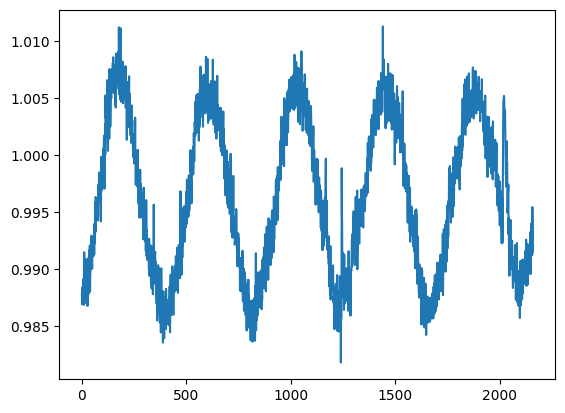

In [44]:
plt.plot(lc2)


Top 5 likely light curve:

1. Archivo: lat_0lon_0radii5.csv, Lat: 0.0, Lon: 0.0, Rad: 5.0, MSE: 0.0000212584
2. Archivo: lat_10lon_0radii5.csv, Lat: 10.0, Lon: 0.0, Rad: 5.0, MSE: 0.0000227807
3. Archivo: lat_20lon_0radii5.csv, Lat: 20.0, Lon: 0.0, Rad: 5.0, MSE: 0.0000254368
4. Archivo: lat_40lon_0radii3.csv, Lat: 40.0, Lon: 0.0, Rad: 3.0, MSE: 0.0000259319
5. Archivo: lat_50lon_0radii5.csv, Lat: 50.0, Lon: 0.0, Rad: 5.0, MSE: 0.0000262667


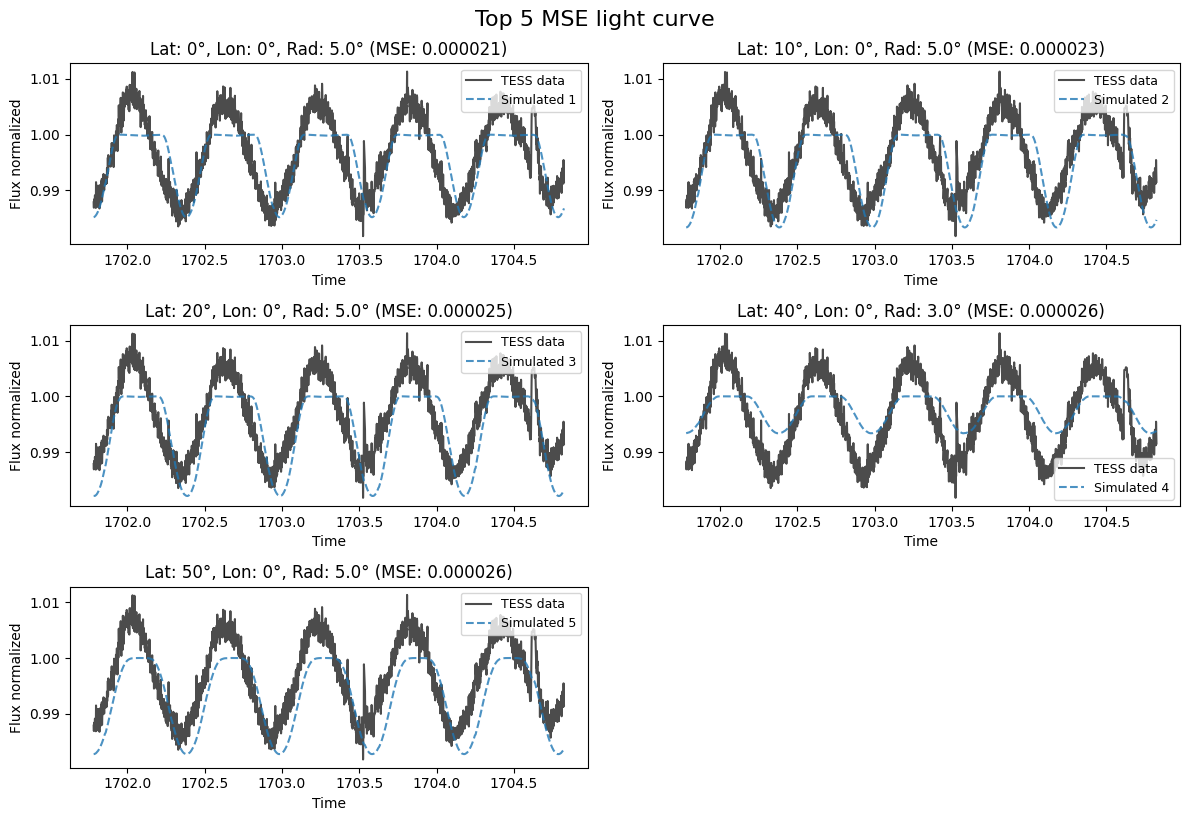


✨ MEJOR AJUSTE GLOBAL:
   Archivo: lat_0lon_0radii5.csv
   Parámetros: Lat=0.0°, Lon=0.0°, Rad=5.0°
   MSE: 0.0000212584


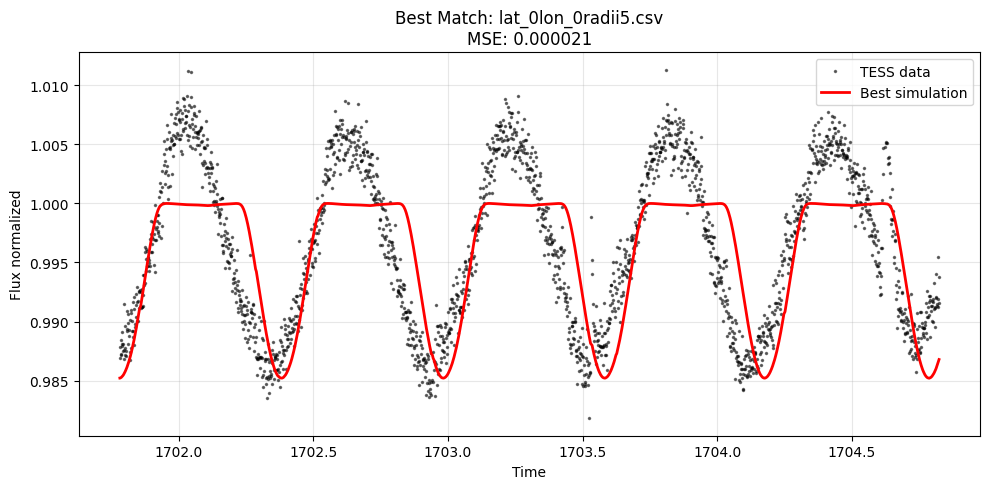

In [48]:


# Asegúrate de que base_flux y base_time estén definidos


#comparison with all lc
sim_folder = 'test1'
results = []

for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        sim_curve = pd.read_csv(path)
        sim_flux = sim_curve['flux_normalized'].values
        

        mse = mean_squared_error(lc2, sim_flux)
        
        # Extraer parámetros del nombre (formato: lat_0lon_0radii3.csv)
        # Quitar extensión
        name = file.replace('.csv', '')
        
        # Extraer latitud (después de 'lat_' y antes de 'lon_')
        lat_start = name.find('lat_') + 4
        lat_end = name.find('lon_')
        lat_str = name[lat_start:lat_end]
        lat = float(lat_str)
        
        # Extraer longitud (después de 'lon_' y antes de 'radii')
        lon_start = name.find('lon_') + 4
        lon_end = name.find('radii')
        lon_str = name[lon_start:lon_end]
        lon = float(lon_str)
        
        # Extraer radio (después de 'radii')
        rad_start = name.find('radii') + 5
        rad_str = name[rad_start:]
        rad = float(rad_str)
        
        results.append({
            'file': file,
            'lat': lat,
            'lon': lon,
            'rad': rad,
            'mse': mse,
            'flux': sim_flux
        })

# Paso 4: Ordenar y mostrar top 5
top5 = sorted(results, key=lambda x: x['mse'])[:5]

print("\nTop 5 likely light curve:\n")
for i, r in enumerate(top5, 1):
    print(f"{i}. Archivo: {r['file']}, Lat: {r['lat']:.1f}, Lon: {r['lon']:.1f}, Rad: {r['rad']:.1f}, MSE: {r['mse']:.10f}")

# Paso 5: Graficar comparaciones
plt.figure(figsize=(12, 8))
for i, r in enumerate(top5, 1):
    plt.subplot(3, 2, i)
    plt.plot(tess_time, lc2, label='TESS data', color='black', alpha=0.7)
    
    # Asegurar que las curvas tengan la misma longitud para graficar
    min_len = min(len(tess_time), len(r['flux']))
    
    plt.plot(tess_time[:min_len], r['flux'][:min_len], 
             label=f"Simulated {i}", linestyle='--', alpha=0.8)
    plt.title(f"Lat: {r['lat']:.0f}°, Lon: {r['lon']:.0f}°, Rad: {r['rad']:.1f}° (MSE: {r['mse']:.6f})")
    plt.xlabel("Time")
    plt.ylabel("Flux normalized")
    plt.legend(fontsize=9)

plt.tight_layout()
plt.suptitle("Top 5 MSE light curve", fontsize=16, y=1.02)
plt.show()

# También mostrar el mejor resultado por separado
if results:
    best = min(results, key=lambda x: x['mse'])
    print(f"\n✨ MEJOR AJUSTE GLOBAL:")
    print(f"   Archivo: {best['file']}")
    print(f"   Parámetros: Lat={best['lat']:.1f}°, Lon={best['lon']:.1f}°, Rad={best['rad']:.1f}°")
    print(f"   MSE: {best['mse']:.10f}")
    
    # Graficar el mejor ajuste por separado
    plt.figure(figsize=(10, 5))
    min_len = min(len(tess_time), len(best['flux']))
    plt.plot(tess_time[:min_len], lc2[:min_len], 'k.', 
             alpha=0.5, label='TESS data', markersize=3)
    plt.plot(tess_time[:min_len], best['flux'][:min_len], 'r-', 
             linewidth=2, label='Best simulation')
    plt.title(f"Best Match: {best['file']}\nMSE: {best['mse']:.6f}")
    plt.xlabel("Time")
    plt.ylabel("Flux normalized")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Analizando carpeta: test1
Número de archivos en la carpeta: 214

Procesados 210 archivos CSV.

RESUMEN ESTADÍSTICO DE RESIDUALES

Estadísticas generales (todos los archivos):
MSE promedio: 0.0002561662
MSE mínimo: 0.0000212584
MSE máximo: 0.0010820499
Desviación estándar de MSE: 0.0002837137
Std promedio de residuales: 0.01235399

TOP 5 MEJORES AJUSTES (MENOR MSE)

1. Archivo: lat_0lon_0radii5.csv
   Parámetros: Lat=0.0°, Lon=0.0°, Rad=5.0°
   MSE: 0.0000212584
   Residuales - Media: 0.00071929, Std: 0.00455423, RMS: 0.00461068
   Rango: [-0.01177586, 0.01177586], Asimetría: -0.5756, Curtosis: -0.4987

2. Archivo: lat_10lon_0radii5.csv
   Parámetros: Lat=10.0°, Lon=0.0°, Rad=5.0°
   MSE: 0.0000227807
   Residuales - Media: 0.00156864, Std: 0.00450778, RMS: 0.00477292
   Rango: [-0.01033827, 0.01258017], Asimetría: -0.6130, Curtosis: -0.4747

3. Archivo: lat_20lon_0radii5.csv
   Parámetros: Lat=20.0°, Lon=0.0°, Rad=5.0°
   MSE: 0.0000254368
   Residuales - Media: 0.00229557, Std: 0.0044

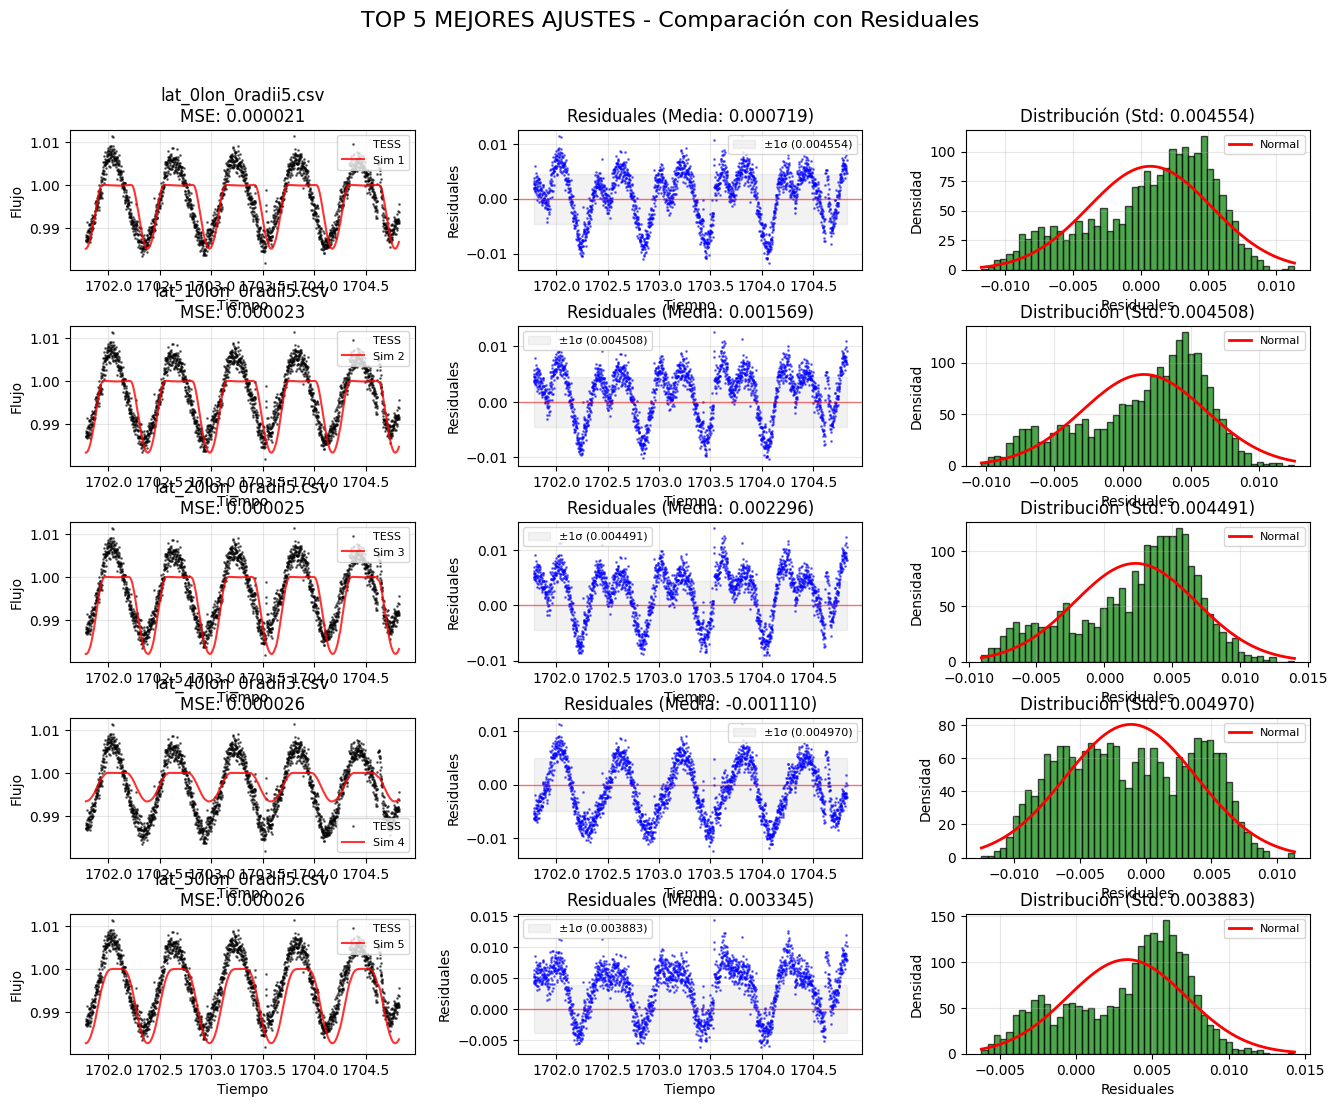

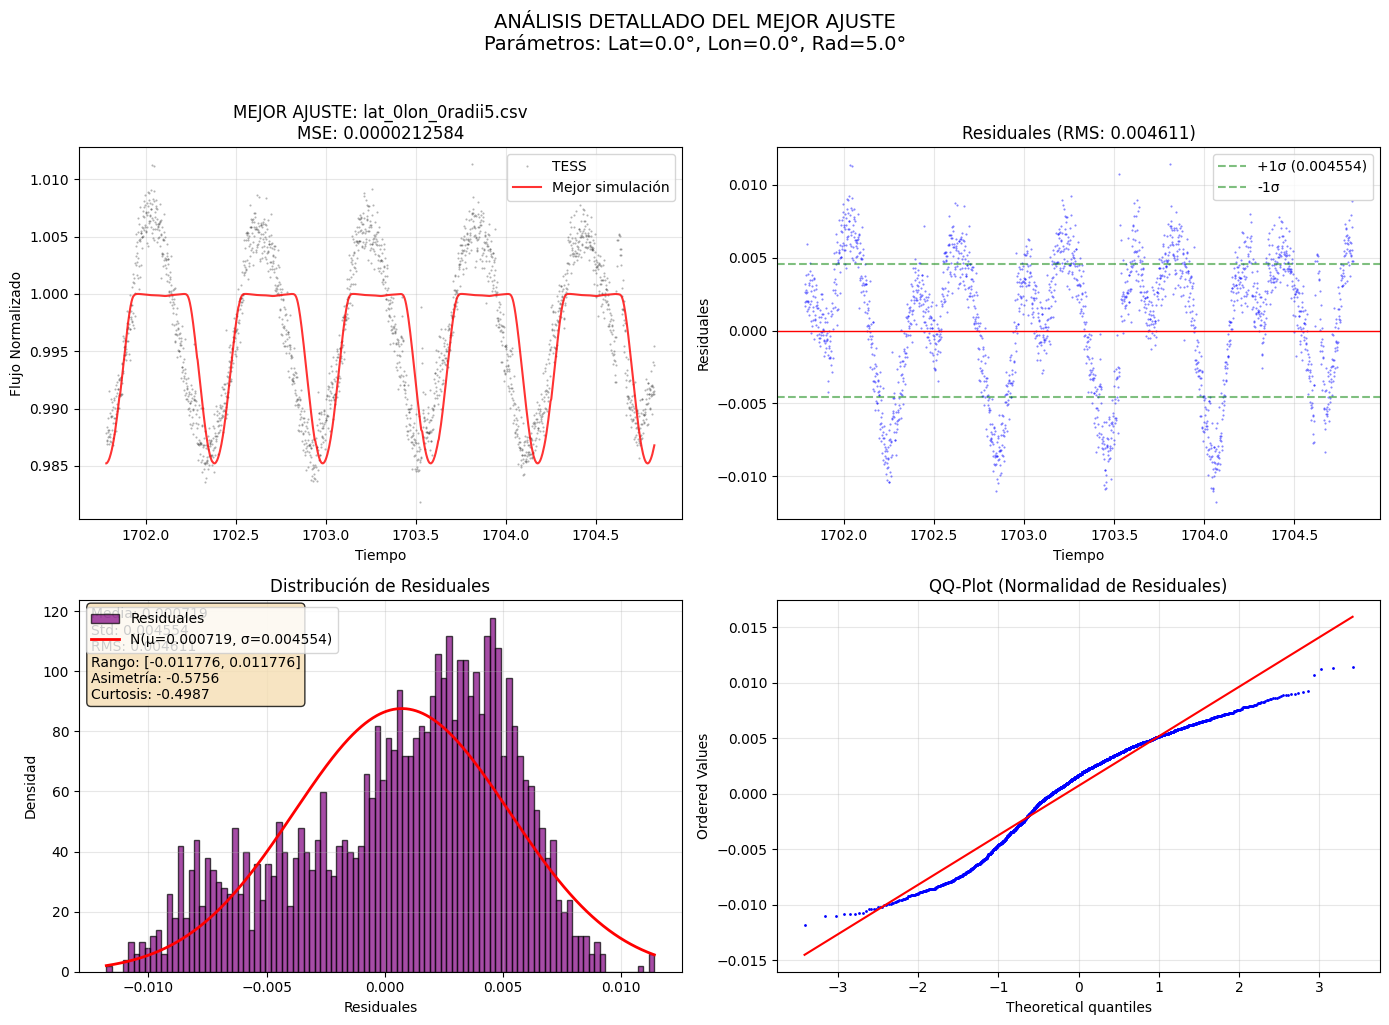

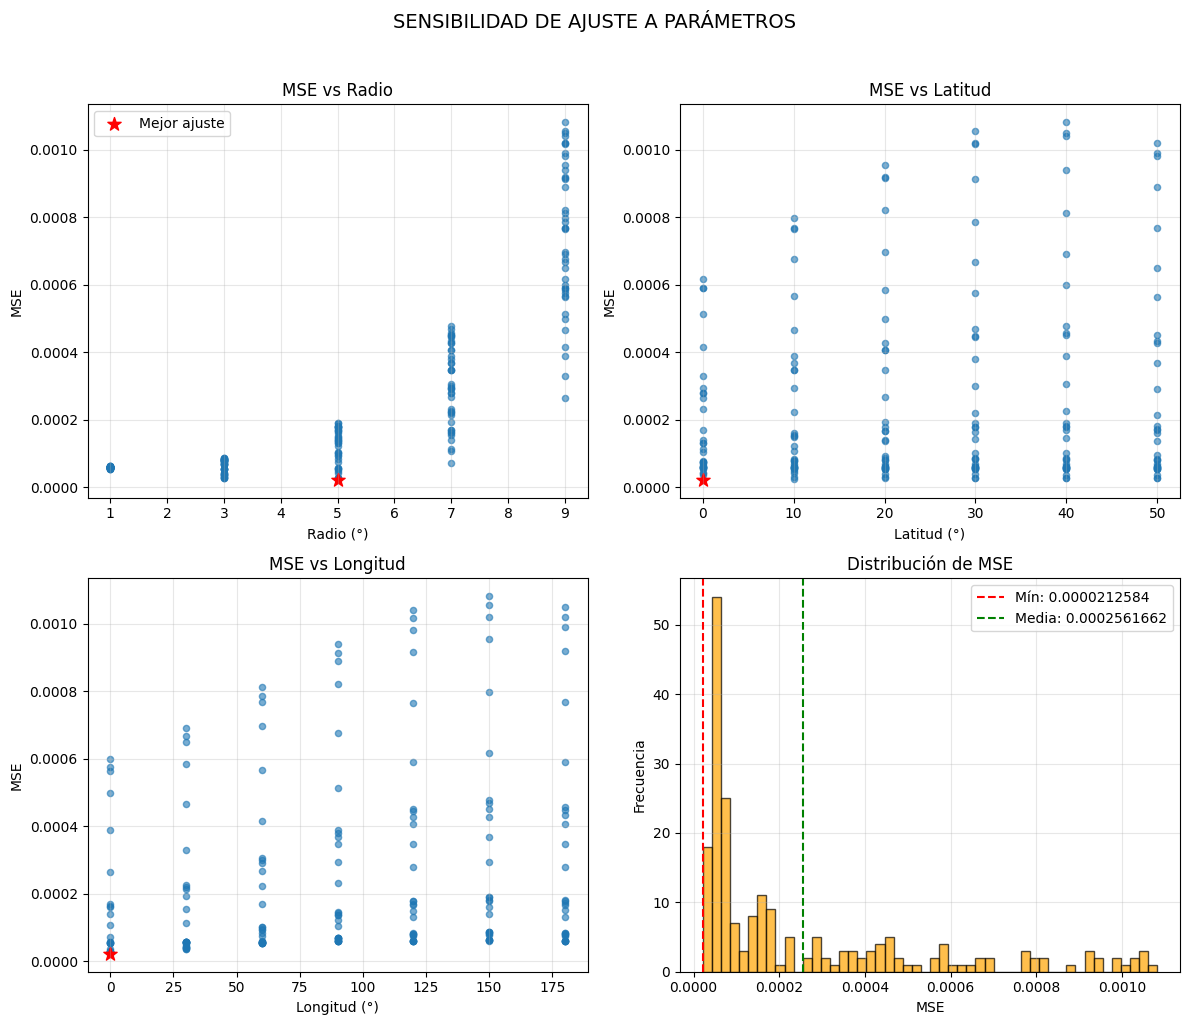


TABLA RESUMEN - TOP 10 AJUSTES

#   Archivo                 Lat    Lon    Rad             MSE      Res_Std      Res_RMS
-------------------------------------------------------------------------------------
1   lat_0lon_0radii5.csv    0.0    0.0    5.0    0.0000212584   0.00455423   0.00461068
2   lat_10lon_0radii5.csv   10.0    0.0    5.0    0.0000227807   0.00450778   0.00477292
3   lat_20lon_0radii5.csv   20.0    0.0    5.0    0.0000254368   0.00449079   0.00504349
4   lat_40lon_0radii3.csv   40.0    0.0    3.0    0.0000259319   0.00496979   0.00509234
5   lat_50lon_0radii5.csv   50.0    0.0    5.0    0.0000262667   0.00388331   0.00512510
6   lat_50lon_0radii3.csv   50.0    0.0    3.0    0.0000263892   0.00502699   0.00513704
7   lat_30lon_0radii3.csv   30.0    0.0    3.0    0.0000266270   0.00501149   0.00516013
8   lat_30lon_0radii5.csv   30.0    0.0    5.0    0.0000275125   0.00440079   0.00524524
9   lat_40lon_0radii5.csv   40.0    0.0    5.0    0.0000275596   0.00417096   0.00

In [51]:


# ==============================================
# CONFIGURACIÓN DE DATOS (ASUMIENDO QUE YA EXISTEN)
# ==============================================
# Asegúrate de que estas variables estén definidas:
# base_time, base_flux, sim_folder = 'test1'

# ==============================================
# FUNCIONES AUXILIARES
# ==============================================

def calculate_residual_stats(base_flux, sim_flux):
    """
    Calcula estadísticas detalladas de los residuales.
    """
    # Asegurar misma longitud
    min_len = min(len(base_flux), len(sim_flux))
    base_cut = base_flux[:min_len]
    sim_cut = sim_flux[:min_len]
    
    # Calcular residuales
    residuals = base_cut - sim_cut
    
    # Estadísticas
    stats_dict = {
        'mse': mean_squared_error(base_cut, sim_cut),
        'residuals': residuals,
        'mean': np.mean(residuals),
        'std': np.std(residuals),
        'rms': np.sqrt(np.mean(residuals**2)),
        'max': np.max(np.abs(residuals)),
        'min': np.min(residuals),
        'range': np.ptp(residuals),
        'skewness': stats.skew(residuals),
        'kurtosis': stats.kurtosis(residuals),
        'mad': np.median(np.abs(residuals - np.median(residuals)))  # MAD
    }
    
    return stats_dict

def parse_filename(filename):
    """
    Extrae parámetros del nombre del archivo.
    Formato esperado: lat_Xlon_YradiiZ.csv
    """
    # Quitar extensión
    name = filename.replace('.csv', '')
    
    # Extraer latitud
    lat_start = name.find('lat_') + 4
    lat_end = name.find('lon_')
    lat_str = name[lat_start:lat_end]
    
    # Extraer longitud
    lon_start = name.find('lon_') + 4
    lon_end = name.find('radii')
    lon_str = name[lon_start:lon_end]
    
    # Extraer radio
    rad_start = name.find('radii') + 5
    rad_str = name[rad_start:]
    
    try:
        lat = float(lat_str)
        lon = float(lon_str)
        rad = float(rad_str)
    except:
        lat = lon = rad = 0.0
    
    return lat, lon, rad

# ==============================================
# ANÁLISIS PRINCIPAL
# ==============================================

print(f"Analizando carpeta: {sim_folder}")
print(f"Número de archivos en la carpeta: {len(os.listdir(sim_folder))}")

results = []

for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        
        try:
            # Cargar curva simulada
            sim_curve = pd.read_csv(path)
            sim_flux = sim_curve['flux_normalized'].values
            
            # Calcular estadísticas de residuales
            res_stats = calculate_residual_stats(lc2, sim_flux)
            
            # Extraer parámetros del nombre
            lat, lon, rad = parse_filename(file)
            
            # Guardar resultados
            results.append({
                'file': file,
                'lat': lat,
                'lon': lon,
                'rad': rad,
                'mse': res_stats['mse'],
                'residuals': res_stats['residuals'],
                'res_mean': res_stats['mean'],
                'res_std': res_stats['std'],
                'res_rms': res_stats['rms'],
                'res_max': res_stats['max'],
                'res_min': res_stats['min'],
                'res_range': res_stats['range'],
                'res_skew': res_stats['skewness'],
                'res_kurt': res_stats['kurtosis'],
                'flux': sim_flux
            })
            
        except Exception as e:
            print(f"Error procesando {file}: {e}")

print(f"\nProcesados {len(results)} archivos CSV.")

# Ordenar por MSE
results_sorted = sorted(results, key=lambda x: x['mse'])
top5 = results_sorted[:5]
worst5 = results_sorted[-5:]

# ==============================================
# 1. RESUMEN ESTADÍSTICO
# ==============================================

print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO DE RESIDUALES")
print("="*80)

print(f"\nEstadísticas generales (todos los archivos):")
all_mse = [r['mse'] for r in results]
all_std = [r['res_std'] for r in results]

print(f"MSE promedio: {np.mean(all_mse):.10f}")
print(f"MSE mínimo: {np.min(all_mse):.10f}")
print(f"MSE máximo: {np.max(all_mse):.10f}")
print(f"Desviación estándar de MSE: {np.std(all_mse):.10f}")
print(f"Std promedio de residuales: {np.mean(all_std):.8f}")

# ==============================================
# 2. TOP 5 MEJORES AJUSTES
# ==============================================

print("\n" + "="*80)
print("TOP 5 MEJORES AJUSTES (MENOR MSE)")
print("="*80)

for i, r in enumerate(top5, 1):
    print(f"\n{i}. Archivo: {r['file']}")
    print(f"   Parámetros: Lat={r['lat']:.1f}°, Lon={r['lon']:.1f}°, Rad={r['rad']:.1f}°")
    print(f"   MSE: {r['mse']:.10f}")
    print(f"   Residuales - Media: {r['res_mean']:.8f}, Std: {r['res_std']:.8f}, RMS: {r['res_rms']:.8f}")
    print(f"   Rango: [{r['res_min']:.8f}, {r['res_max']:.8f}], Asimetría: {r['res_skew']:.4f}, Curtosis: {r['res_kurt']:.4f}")

# ==============================================
# 3. GRÁFICAS DE COMPARACIÓN - TOP 5
# ==============================================

fig = plt.figure(figsize=(16, 12))

# Configurar subplots
gs = plt.GridSpec(5, 3, figure=fig, hspace=0.4, wspace=0.3)

for i, r in enumerate(top5, 0):
    # Obtener longitud mínima
    min_len = min(len(tess_time), len(r['flux']))
    time_cut = tess_time[:min_len]
    base_cut = lc2[:min_len]
    sim_cut = r['flux'][:min_len]
    residuals = r['residuals'][:min_len]
    
    # 1. Comparación de curvas (columna 1)
    ax1 = fig.add_subplot(gs[i, 0])
    ax1.plot(time_cut, base_cut, 'k.', alpha=0.5, markersize=2, label='TESS')
    ax1.plot(time_cut, sim_cut, 'r-', linewidth=1.5, alpha=0.8, label=f'Sim {i+1}')
    ax1.set_title(f"{r['file']}\nMSE: {r['mse']:.6f}")
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Flujo')
    ax1.legend(fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # 2. Residuales vs tiempo (columna 2)
    ax2 = fig.add_subplot(gs[i, 1])
    ax2.plot(time_cut, residuals, 'b.', alpha=0.5, markersize=2)
    ax2.axhline(y=0, color='r', linestyle='-', linewidth=1, alpha=0.5)
    ax2.fill_between([time_cut.min(), time_cut.max()], 
                     -r['res_std'], r['res_std'], 
                     alpha=0.1, color='gray', label=f'±1σ ({r["res_std"]:.6f})')
    ax2.set_xlabel('Tiempo')
    ax2.set_ylabel('Residuales')
    ax2.set_title(f'Residuales (Media: {r["res_mean"]:.6f})')
    ax2.legend(fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    # 3. Histograma de residuales (columna 3)
    ax3 = fig.add_subplot(gs[i, 2])
    ax3.hist(residuals, bins=50, alpha=0.7, color='green', edgecolor='black', density=True)
    # Añadir curva normal teórica
    x = np.linspace(residuals.min(), residuals.max(), 100)
    y = stats.norm.pdf(x, r['res_mean'], r['res_std'])
    ax3.plot(x, y, 'r-', linewidth=2, label='Normal')
    ax3.set_xlabel('Residuales')
    ax3.set_ylabel('Densidad')
    ax3.set_title(f'Distribución (Std: {r["res_std"]:.6f})')
    ax3.legend(fontsize=8)
    ax3.grid(True, alpha=0.3)

plt.suptitle('TOP 5 MEJORES AJUSTES - Comparación con Residuales', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# ==============================================
# 4. MEJOR AJUSTE INDIVIDUAL
# ==============================================

if results_sorted:
    best = results_sorted[0]
    min_len = min(len(tess_time), len(best['flux']))
    time_cut = tess_time[:min_len]
    base_cut = lc2[:min_len]
    sim_cut = best['flux'][:min_len]
    residuals = best['residuals'][:min_len]
    
    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Comparación completa
    axes2[0, 0].plot(time_cut, base_cut, 'k.', alpha=0.3, markersize=1, label='TESS')
    axes2[0, 0].plot(time_cut, sim_cut, 'r-', linewidth=1.5, alpha=0.8, label='Mejor simulación')
    axes2[0, 0].set_xlabel('Tiempo')
    axes2[0, 0].set_ylabel('Flujo Normalizado')
    axes2[0, 0].set_title(f'MEJOR AJUSTE: {best["file"]}\nMSE: {best["mse"]:.10f}')
    axes2[0, 0].legend()
    axes2[0, 0].grid(True, alpha=0.3)
    
    # 2. Residuales vs tiempo
    axes2[0, 1].plot(time_cut, residuals, 'b.', alpha=0.5, markersize=1)
    axes2[0, 1].axhline(y=0, color='r', linestyle='-', linewidth=1)
    axes2[0, 1].axhline(y=best['res_std'], color='g', linestyle='--', alpha=0.5, label=f'+1σ ({best["res_std"]:.6f})')
    axes2[0, 1].axhline(y=-best['res_std'], color='g', linestyle='--', alpha=0.5, label=f'-1σ')
    axes2[0, 1].set_xlabel('Tiempo')
    axes2[0, 1].set_ylabel('Residuales')
    axes2[0, 1].set_title(f'Residuales (RMS: {best["res_rms"]:.6f})')
    axes2[0, 1].legend()
    axes2[0, 1].grid(True, alpha=0.3)
    
    # 3. Histograma detallado
    axes2[1, 0].hist(residuals, bins=100, alpha=0.7, color='purple', 
                     edgecolor='black', density=True, label='Residuales')
    # Añadir curva normal
    x = np.linspace(residuals.min(), residuals.max(), 1000)
    y = stats.norm.pdf(x, best['res_mean'], best['res_std'])
    axes2[1, 0].plot(x, y, 'r-', linewidth=2, label=f'N(μ={best["res_mean"]:.6f}, σ={best["res_std"]:.6f})')
    
    # Estadísticas en texto
    stats_text = (f'Media: {best["res_mean"]:.6f}\n'
                  f'Std: {best["res_std"]:.6f}\n'
                  f'RMS: {best["res_rms"]:.6f}\n'
                  f'Rango: [{best["res_min"]:.6f}, {best["res_max"]:.6f}]\n'
                  f'Asimetría: {best["res_skew"]:.4f}\n'
                  f'Curtosis: {best["res_kurt"]:.4f}')
    
    axes2[1, 0].text(0.02, 0.98, stats_text, transform=axes2[1, 0].transAxes,
                     fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes2[1, 0].set_xlabel('Residuales')
    axes2[1, 0].set_ylabel('Densidad')
    axes2[1, 0].set_title('Distribución de Residuales')
    axes2[1, 0].legend()
    axes2[1, 0].grid(True, alpha=0.3)
    
    # 4. QQ-Plot para normalidad
    stats.probplot(residuals, dist="norm", plot=axes2[1, 1])
    axes2[1, 1].get_lines()[0].set_marker('.')
    axes2[1, 1].get_lines()[0].set_markersize(2)
    axes2[1, 1].get_lines()[0].set_markerfacecolor('blue')
    axes2[1, 1].get_lines()[1].set_color('red')
    axes2[1, 1].set_title('QQ-Plot (Normalidad de Residuales)')
    axes2[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle(f'ANÁLISIS DETALLADO DEL MEJOR AJUSTE\n'
                 f'Parámetros: Lat={best["lat"]:.1f}°, Lon={best["lon"]:.1f}°, Rad={best["rad"]:.1f}°',
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# ==============================================
# 5. ANÁLISIS DE SENSIBILIDAD A PARÁMETROS
# ==============================================

fig3, axes3 = plt.subplots(2, 2, figsize=(12, 10))

# Convertir a DataFrame para facilitar análisis
df_results = pd.DataFrame(results)

# 1. MSE vs Radio
if 'rad' in df_results.columns:
    axes3[0, 0].scatter(df_results['rad'], df_results['mse'], alpha=0.6, s=20)
    axes3[0, 0].set_xlabel('Radio (°)')
    axes3[0, 0].set_ylabel('MSE')
    axes3[0, 0].set_title('MSE vs Radio')
    axes3[0, 0].grid(True, alpha=0.3)
    # Resaltar el mejor
    if not df_results.empty:
        best_idx = df_results['mse'].idxmin()
        axes3[0, 0].scatter(df_results.loc[best_idx, 'rad'], 
                           df_results.loc[best_idx, 'mse'], 
                           color='red', s=100, marker='*', label='Mejor ajuste')
        axes3[0, 0].legend()

# 2. MSE vs Latitud
if 'lat' in df_results.columns:
    axes3[0, 1].scatter(df_results['lat'], df_results['mse'], alpha=0.6, s=20)
    axes3[0, 1].set_xlabel('Latitud (°)')
    axes3[0, 1].set_ylabel('MSE')
    axes3[0, 1].set_title('MSE vs Latitud')
    axes3[0, 1].grid(True, alpha=0.3)
    if not df_results.empty:
        axes3[0, 1].scatter(df_results.loc[best_idx, 'lat'], 
                           df_results.loc[best_idx, 'mse'], 
                           color='red', s=100, marker='*')

# 3. MSE vs Longitud
if 'lon' in df_results.columns:
    axes3[1, 0].scatter(df_results['lon'], df_results['mse'], alpha=0.6, s=20)
    axes3[1, 0].set_xlabel('Longitud (°)')
    axes3[1, 0].set_ylabel('MSE')
    axes3[1, 0].set_title('MSE vs Longitud')
    axes3[1, 0].grid(True, alpha=0.3)
    if not df_results.empty:
        axes3[1, 0].scatter(df_results.loc[best_idx, 'lon'], 
                           df_results.loc[best_idx, 'mse'], 
                           color='red', s=100, marker='*')

# 4. Distribución de MSE
axes3[1, 1].hist(df_results['mse'], bins=50, alpha=0.7, color='orange', 
                 edgecolor='black')
axes3[1, 1].axvline(x=df_results['mse'].min(), color='red', linestyle='--', 
                    label=f'Mín: {df_results["mse"].min():.10f}')
axes3[1, 1].axvline(x=df_results['mse'].mean(), color='green', linestyle='--', 
                    label=f'Media: {df_results["mse"].mean():.10f}')
axes3[1, 1].set_xlabel('MSE')
axes3[1, 1].set_ylabel('Frecuencia')
axes3[1, 1].set_title('Distribución de MSE')
axes3[1, 1].legend()
axes3[1, 1].grid(True, alpha=0.3)

plt.suptitle('SENSIBILIDAD DE AJUSTE A PARÁMETROS', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# ==============================================
# 6. TABLA RESUMEN EXTENDIDA
# ==============================================

print("\n" + "="*80)
print("TABLA RESUMEN - TOP 10 AJUSTES")
print("="*80)

print(f"\n{'#':<3} {'Archivo':<20} {'Lat':>6} {'Lon':>6} {'Rad':>6} {'MSE':>15} {'Res_Std':>12} {'Res_RMS':>12}")
print("-"*85)

for i, r in enumerate(results_sorted[:10], 1):
    print(f"{i:<3} {r['file']:<20} {r['lat']:>6.1f} {r['lon']:>6.1f} {r['rad']:>6.1f} "
          f"{r['mse']:>15.10f} {r['res_std']:>12.8f} {r['res_rms']:>12.8f}")

# ==============================================
# 7. EXPORTAR RESULTADOS (OPCIONAL)
# ==============================================

